# INÍCIO E IMPORTAÇÃO DA BASE DE DADOS

In [ ]:
install.packages('corrplot')
library('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Importação dos dados
#obs: Estamos substituindo todos os dados faltantes '-999' por NA
psdata <- read.csv('train.csv', na.strings = '-999')
psmeta <- read.csv('metadata.csv')

In [ ]:
#Excluindo a primeira coluna 'id' de psdata e a primeira linha 'id' de psmeta
psdata <- psdata[,-1]
psmeta <- psmeta[-1,]

# FUNÇÕES E UTILITÁRIOS


- Moda
- TabelaDeMedidasResumo
- QuantidadeDeValoresPossivelmenteDiscrepantes
- OpcoesDeValoresVarQual
- DadosFaltantesPorVariavel

In [ ]:
# Tipos de variáveis
QualNom <- (psmeta[,2] == 'Qualitativo nominal') #Linhas que são QuantNom
QualOrd <- (psmeta[,2] == 'Qualitativo ordinal') #Linhas que são QuantOrd
QuantDisc <- (psmeta[,2] == 'Quantitativo discreto') #Linhas que são QuantDisc
QuantCont <- (psmeta[,2] == 'Quantitativo continua') #Linhas que são QuantCont

In [ ]:
OpcoesDeValoresVarQual <- function(tipoDeVariavel){
  #Monta uma tabela mostrando os valores únicos assumidos por variável
  tabelaTipoVariavel = psdata[tipoDeVariavel]
  df = data.frame(
    variavel = c(names(tabelaTipoVariavel))
  )
  for(v in 1:ncol(tabelaTipoVariavel)){
    df[v,"Qtd_de_valores_diferentes_que_a_variável_pode_assumir"] =  length(unique(tabelaTipoVariavel[,v]))
  }
  return (df)
}

In [ ]:
QuantidadeDeValoresPossivelmenteDiscrepantes <- function (tipoDeVariavel){
  # Retorna uma tabela em que a primeira coluna se refere ao nome da variável e as outras os seus valores discrepantes

  tabelaTipoVariavel = psdata[tipoDeVariavel]

   Quantidade_De_Possiveis_Valores_Discrepantes = data.frame(
      variáveis = c(names(tabelaTipoVariavel))
   )

  for(v in 1:ncol(tabelaTipoVariavel)){
    coluna = tabelaTipoVariavel[ ,v] # Acessando coluna
    resumoColuna = boxplot.stats(coluna) # Acessando os valores de LI e LS
    LI = resumoColuna$stats[1] #Limite Inferior
    LS = resumoColuna$stats[5] #Limite Superior
    Quantidade_De_Possiveis_Valores_Discrepantes[v,"Quantidade Acima do LS"] = length(coluna[(coluna > LS) & (!is.na(coluna) )])
    Quantidade_De_Possiveis_Valores_Discrepantes[v,"Quantidade Abaixo do LI"] = length(coluna[(coluna < LI) & (!is.na(coluna) )])
  }

  Quantidade_De_Possiveis_Valores_Discrepantes[,"total_discrepantes"] =  Quantidade_De_Possiveis_Valores_Discrepantes[,"Quantidade Acima do LS"] +
    Quantidade_De_Possiveis_Valores_Discrepantes[,"Quantidade Abaixo do LI"]

  return(Quantidade_De_Possiveis_Valores_Discrepantes)
}

In [ ]:
TabelaDeMedidasResumo <- function(tipoDeVariavel){
  # Retorna uma tabela com insformações das medidas-resumos de posição e dispersão

  tabelaTipoVariavel = psdata[tipoDeVariavel]
  medidasResumo = data.frame(
    Variaveis = c(names(tabelaTipoVariavel))
  )

  for(v in 1:ncol(tabelaTipoVariavel)){
      colunaAtual = tabelaTipoVariavel[,v]
      medidasResumo[v, "Média"] = mean(colunaAtual, na.rm = T)
      medidasResumo[v, "Mediana"] = median(colunaAtual, na.rm = T)
      medidasResumo[v,"Desvio Padrão"] = sd(colunaAtual, na.rm = T)
      medidasResumo[v, "Coeficiente de variacao (%)"] =
      medidasResumo[v, "Desvio Absoluto Mediano"] = median(abs(colunaAtual - median(colunaAtual, na.rm = T)), na.rm = T)
      medidasResumo[v, "Max."] = max(colunaAtual, na.rm = T)
      medidasResumo[v,"Min."] = min(colunaAtual, na.rm = T)
    }

  return(medidasResumo)
  }




In [ ]:
Moda <- function(tipoDeVariavel){
  #Função que calcula a moda para todas as variáveis do tipo específicado
  tabelaTipoVariavel = psdata[tipoDeVariavel]
  medidasResumo = data.frame(
    Variaveis = c(names(tabelaTipoVariavel))
  )

  for(v in 1:ncol(tabelaTipoVariavel)){
    colunaAtual = tabelaTipoVariavel[,v]
    tabelaFrequencia = table(tabelaTipoVariavel[,v])
    medidasResumo[v, "Moda"] = toString(names(tabelaFrequencia[tabelaFrequencia == max(tabelaFrequencia, na.rm = T)]))
    medidasResumo[v, "Nº de ocorrência"] = max(tabelaFrequencia, na.rm = T)
  }

  return(medidasResumo)
}

In [ ]:
DadosFaltantesPorVariavel <- function(tipoDeVariavel){
  #Seleciona a tabela do tipo de variável especificada
  #Retorna uma tabela com a quantidade de dados faltantes por variável
  tabelaTipoVariavel = psdata[tipoDeVariavel]

  tabela_Dados_Faltantes = data.frame(
    variaveis = c(names(tabelaTipoVariavel))
  )

  for( v in 1:ncol(tabelaTipoVariavel)){
    colunaAtual = tabelaTipoVariavel[,v]
    tabela_Dados_Faltantes[v,"Qtd. Dados Ausentes"] = sum(1*is.na(colunaAtual))
  }

  tabela_Dados_Faltantes[,"Porcentagem | (Dados Ausentes ÷ 14123)%"] = (tabela_Dados_Faltantes[,"Qtd. Dados Ausentes"]/14123)*100

  return(tabela_Dados_Faltantes)
}

# ESTUDO DO ARQUIVO 'metadata.csv' - INFORMAÇÕES GERAIS

In [ ]:
# O arquivo meta traz informações sobre nossos dados
head(psmeta)

,Variavel.cod,Variavel.tipo
,<chr>,<chr>
2,var1,Qualitativo nominal
3,var2,Qualitativo nominal
4,var3,Qualitativo nominal
5,var4,Qualitativo nominal
6,var5,Qualitativo nominal
7,var6,Qualitativo nominal


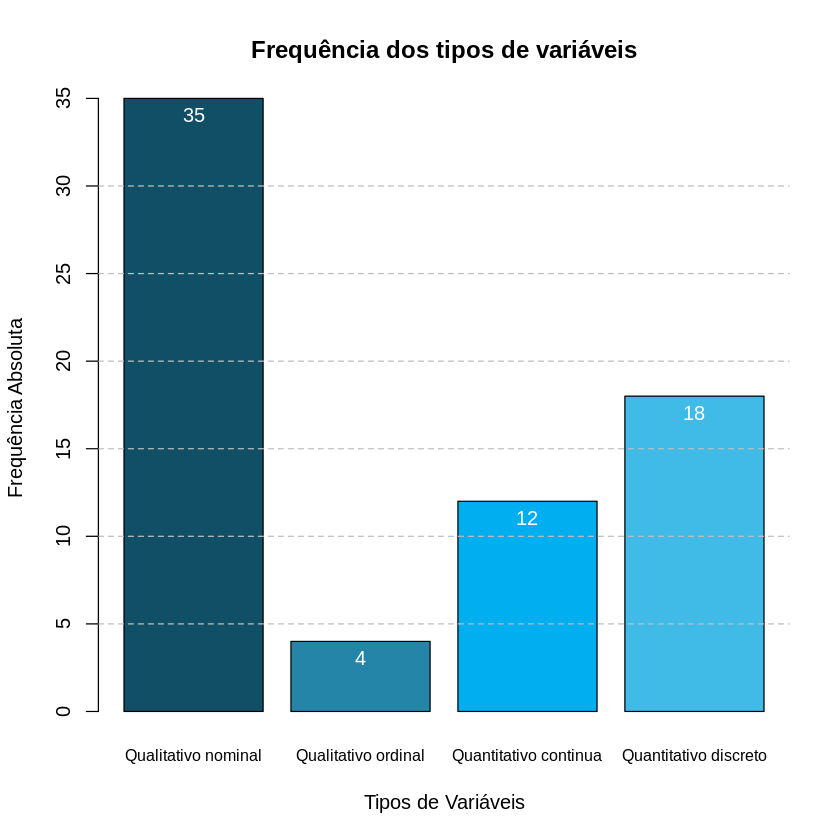

In [ ]:
text(
barplot(
  table(psmeta[,2]),
  main = "Frequência dos tipos de variáveis",
  cex.names= .8,
  xlab = "Tipos de Variáveis",
  ylab = "Frequência Absoluta",
  col = c("#114F66", "#2585A8", "#01AEEF", "#40BAE6"),
  )
  , y = c(35, 4, 12, 18), labels = c(35, 4, 12, 18), pos = 1, col = "white"
  )
  abline(h = c(5, 10, 15, 20, 25, 30), col = "gray", lty = "dashed")

# ESTUDO DO ARQUIVO 'train.csv'- INFORMAÇÕES GERAIS

In [ ]:
#Dados Faltantes
dadosFaltantes = sum(1*is.na(psdata)) # 63187
dFrelativo = (dadosFaltantes/(14123*69))*100
dFrelativo

[1] 6.48413

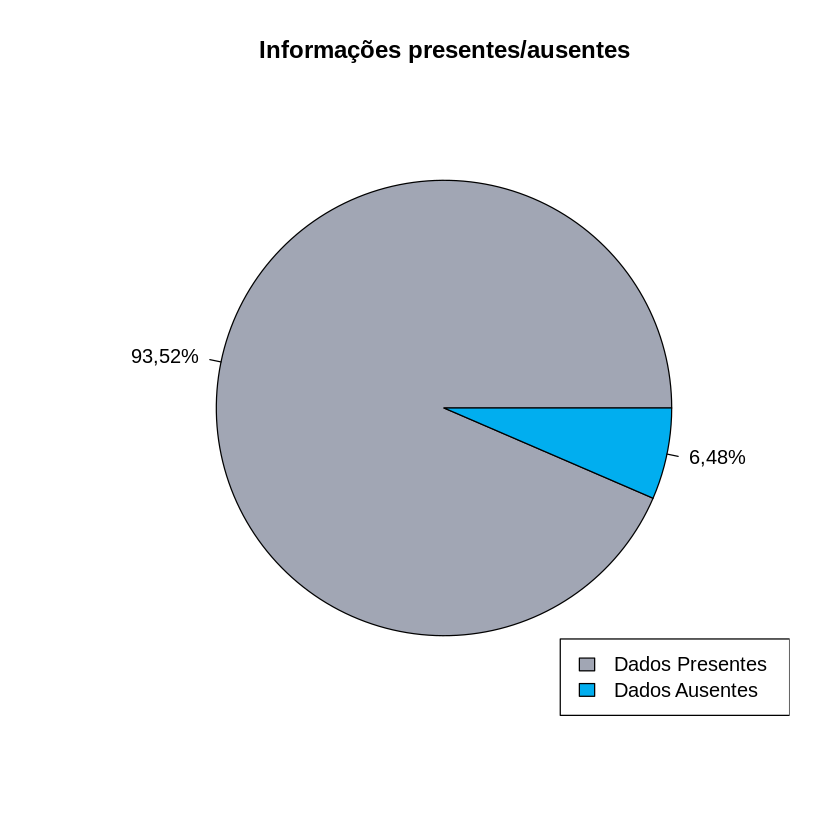

In [ ]:
colors = c("#a1a6b4","#01AEEF")
pie(
  table(is.na(psdata)),
  main = "Informações presentes/ausentes",
  label = c("93,52%", "6,48%"),
  col = colors
  )
legend("bottomright", c("Dados Presentes", "Dados Ausentes"), fill = colors)

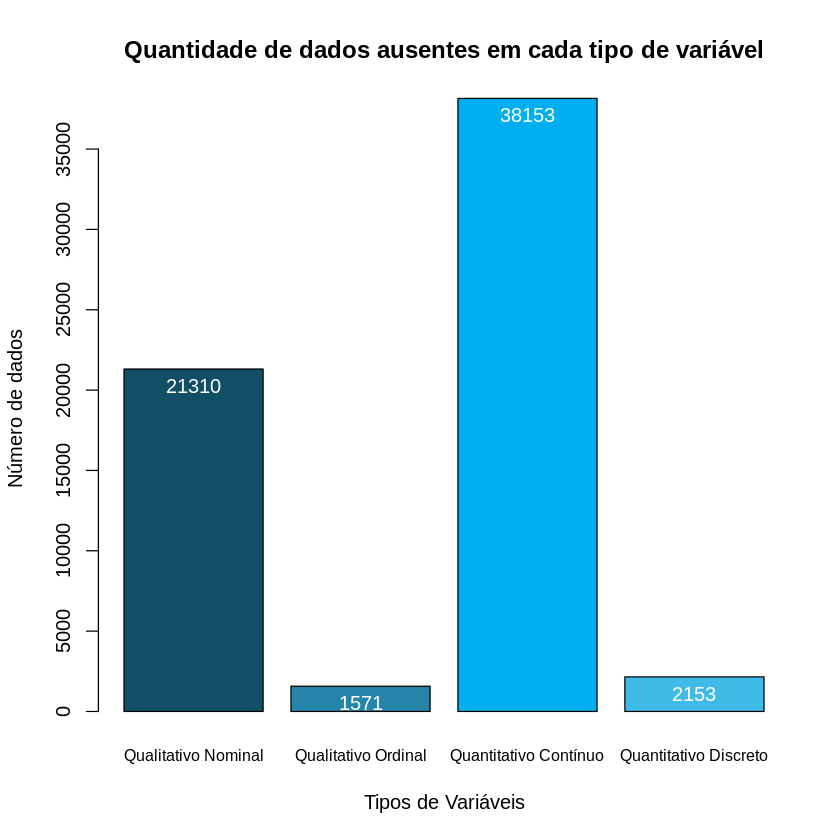

In [ ]:
# Distribuição de dados ausentes em cada tipo de variável
QN =sum(1*is.na(psdata[QualNom]))
QO =sum(1*is.na(psdata[QualOrd]))
QC = sum(1*is.na(psdata[QuantCont]))
QD = sum(1*is.na(psdata[QuantDisc]))
valores = c(QN, QO, QC, QD)
nomes = c("Qualitativo Nominal", "Qualitativo Ordinal", "Quantitativo Contínuo", "Quantitativo Discreto")
text(
barplot(
  valores,
  names.arg = nomes,
  main = "Quantidade de dados ausentes em cada tipo de variável",
  cex.names= .8,
  xlab = "Tipos de Variáveis",
  ylab = "Número de dados",
  col = c("#114F66", "#2585A8", "#01AEEF", "#40BAE6")
  )
  , y = valores, labels = valores, pos = 1, col = "white"
  )


# ESTUDO DAS VARIÁVEIS QUALITATIVAS NOMINAIS

  

---
  - Medidas de resumo (MODA);
  - Dados Faltantes;
  - Teste de Chi Quadrado
  - Tabela de contingência
---



In [ ]:
head(psdata[QualNom])

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,⋯,var30,var31,var33,var34,var35,var36,var37,var38,var39,var41
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,18,19,2853,29442,1386,2435,35,NA,3,63,⋯,2,0,3,44,463,27,2,0,4,3
2,4,110,1986,13684,7189,NA,NA,17,3,63,⋯,1,0,0,1,532,2,1,0,4,3
3,0,39,1019,10232,678,791,16,NA,3,63,⋯,1,0,1,3,81,26,3,0,4,3
4,20,39,1751,2689,8235,1042,13,10,1,14,⋯,2,0,0,11,414,27,0,0,4,3
5,7,44,2262,29428,6031,304,16,NA,3,63,⋯,1,0,4,3,567,8,3,2,4,3
6,18,NA,NA,16114,208,NA,NA,NA,1,63,⋯,2,0,5,9,474,2,21,0,4,3


[1]     2     3     4     5     6     6     6     7     7    10    28    28
[13]    28    29    29    29    33    33    33    47    61    69    77    77
[25]    85   567  1201  1499  1534  1779  2443  5270  6296 12384 13094

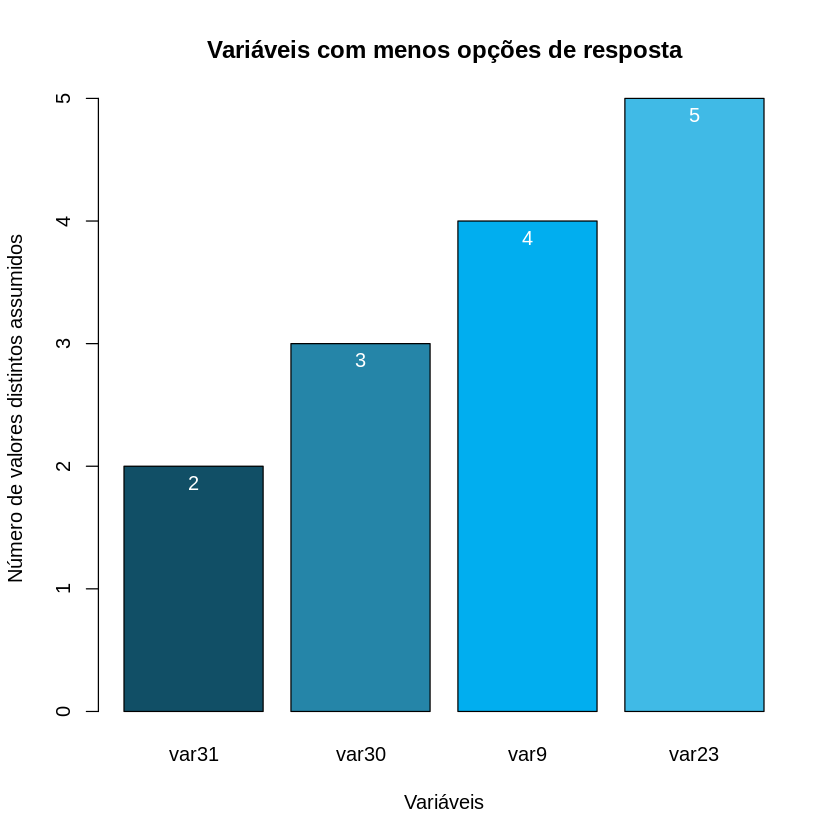


    0     1 
13609   514 

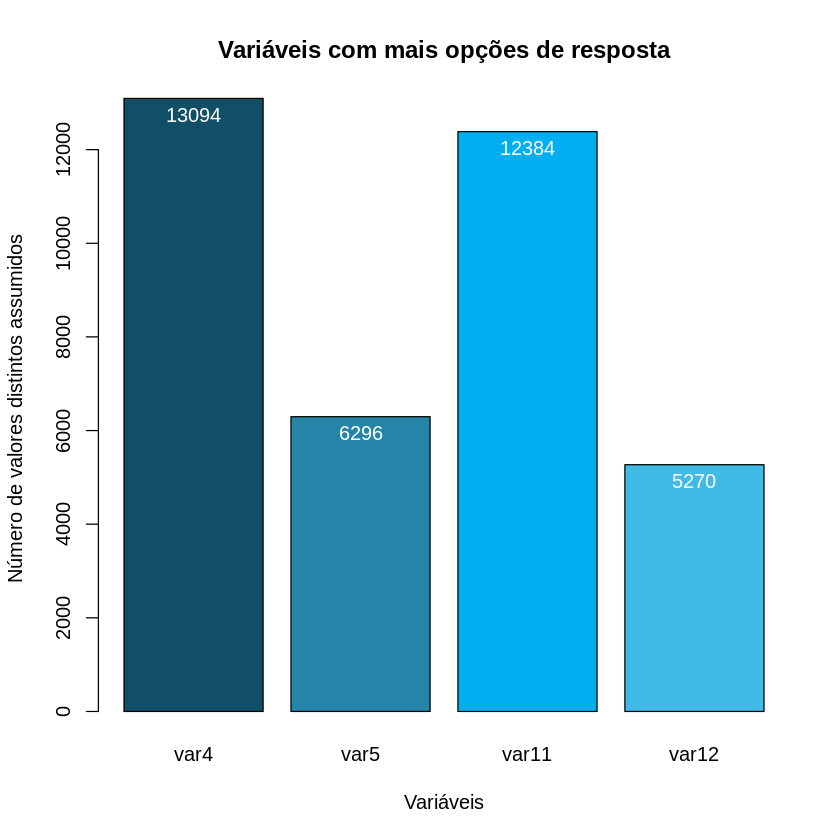

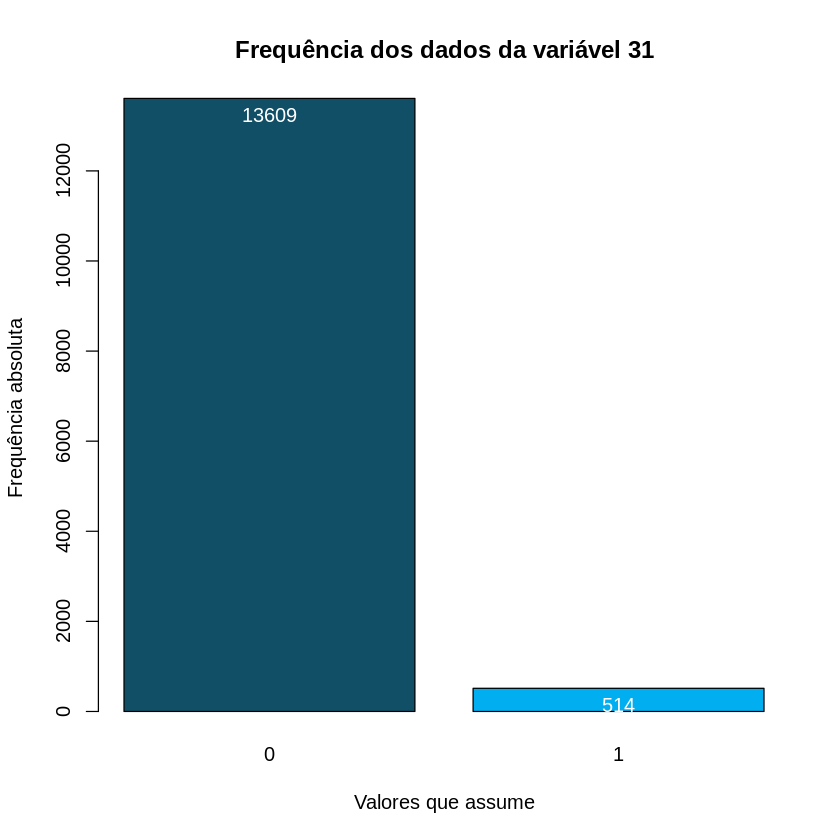

In [ ]:
odv = OpcoesDeValoresVarQual(QualNom)
sort(odv[,2])
menoresValores = odv[c(27,26,9,23),]
maioresValores = odv[c(4,5,11,12),]

text(
barplot(
  menoresValores[,2],
  names.arg = menoresValores[,1],
  main = "Variáveis com menos opções de resposta",
  xlab = "Variáveis",
  ylab = "Número de valores distintos assumidos",
  col = c("#114F66", "#2585A8", "#01AEEF", "#40BAE6"),
), y = menoresValores[,2], labels = menoresValores[,2], pos = 1, col = "white"
)

text(
barplot(
  maioresValores[,2],
  names.arg = maioresValores[,1],
  main = "Variáveis com mais opções de resposta",
  xlab = "Variáveis",
  ylab = "Número de valores distintos assumidos",
  col = c("#114F66", "#2585A8", "#01AEEF", "#40BAE6")
) , y = maioresValores[,2], labels = maioresValores[,2], pos = 1, col = "white"
)

table(psdata$var31)
text(
barplot(
  table(psdata$var31),
  main = "Frequência dos dados da variável 31",
  xlab = "Valores que assume",
  ylab = "Frequência absoluta",
  col = c("#114F66",  "#01AEEF")
) , y = c(13609, 514), labels = c(13609, 514), pos = 1, col = "white")

In [ ]:
tabelaModa = Moda(QualNom)
tabelaModa
tabelaModa[c(33,34,35),]


Variaveis,Moda,Nº de ocorrência
<chr>,<chr>,<int>
var1,4,5148
var2,126,2558
var3,1446,283
var4,976,4
var5,6376,985
var6,2453,2050
var7,35,6581
var8,27,6437
var9,3,8694


,Variaveis,Moda,Nº de ocorrência
,<chr>,<chr>,<int>
33,var38,0,10748
34,var39,4,12084
35,var41,3,11738


variaveis,Qtd. Dados Ausentes,Porcentagem | (Dados Ausentes ÷ 14123)%
<chr>,<dbl>,<dbl>
var1,0,0.000000
var2,599,4.241309
var3,599,4.241309
var4,936,6.627487
var5,0,0.000000
var6,1871,13.247894
var7,1895,13.417829
var8,2214,15.676556
var9,1534,10.861715


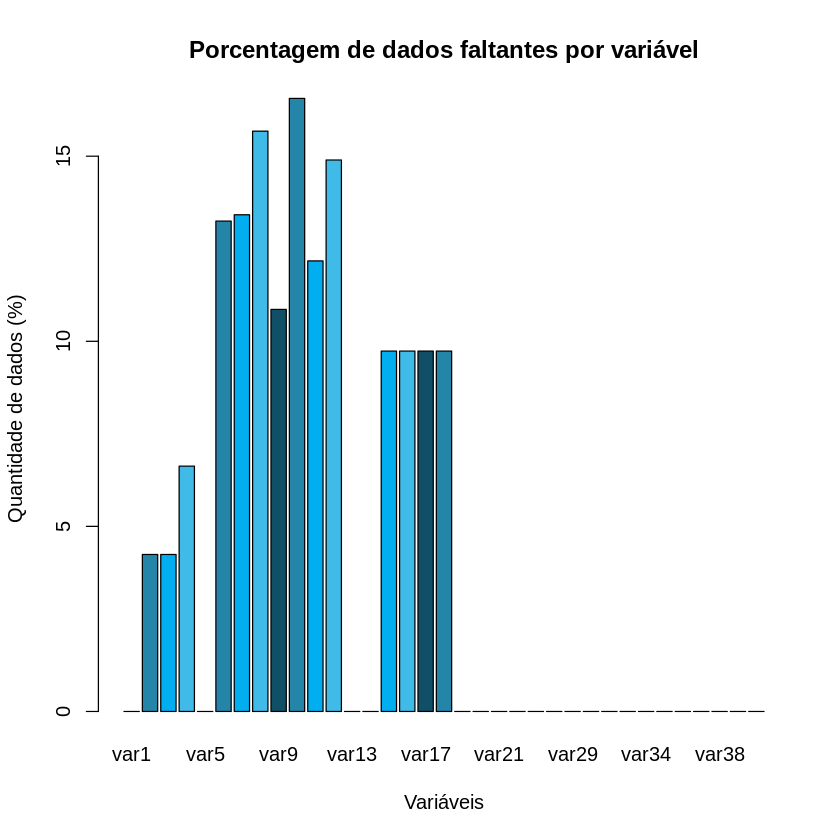

In [ ]:
dfpv = DadosFaltantesPorVariavel(QualNom)
DadosFaltantesPorVariavel(QualNom)

barplot(
  dfpv[,3],
  names.arg = dfpv[,1],
  main = "Porcentagem de dados faltantes por variável",
  xlab = "Variáveis",
  ylab = "Quantidade de dados (%)",
  col = c("#114F66", "#2585A8", "#01AEEF", "#40BAE6")
)


In [ ]:
# TESTE CHI QUADRADO

# ESTUDO DAS VARIÁVEIS QUALITATIVAS ORDINAIS

  - Medidas de resumo (MODA, MEDIANA);
  - Dados Faltantes;
  - Frequência de dados;
  - Tabela de contingência.
  - Teste de Chi Quadrado;

In [ ]:
head(psdata[QualOrd])

,var26,var32,var42,var43
,<int>,<int>,<int>,<int>
1,7,16,25,6
2,6,14,30,3
3,7,11,23,5
4,1,8,22,10
5,8,17,26,5
6,6,13,28,4


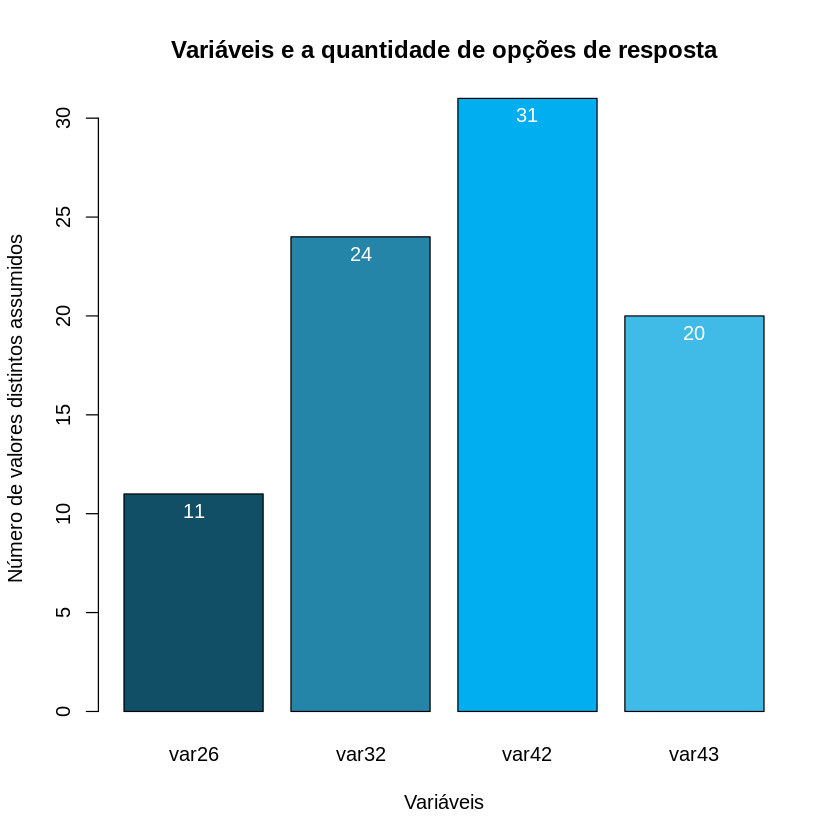

In [ ]:
opv = OpcoesDeValoresVarQual(QualOrd)

text(
barplot(
  opv[,2],
  names.arg = opv[,1],
  main = 'Variáveis e a quantidade de opções de resposta',
  xlab = "Variáveis",
  ylab = "Número de valores distintos assumidos",
  col = c("#114F66", "#2585A8", "#01AEEF", "#40BAE6")
), y = opv[,2], labels = opv[,2], pos = 1, col = "white"
)

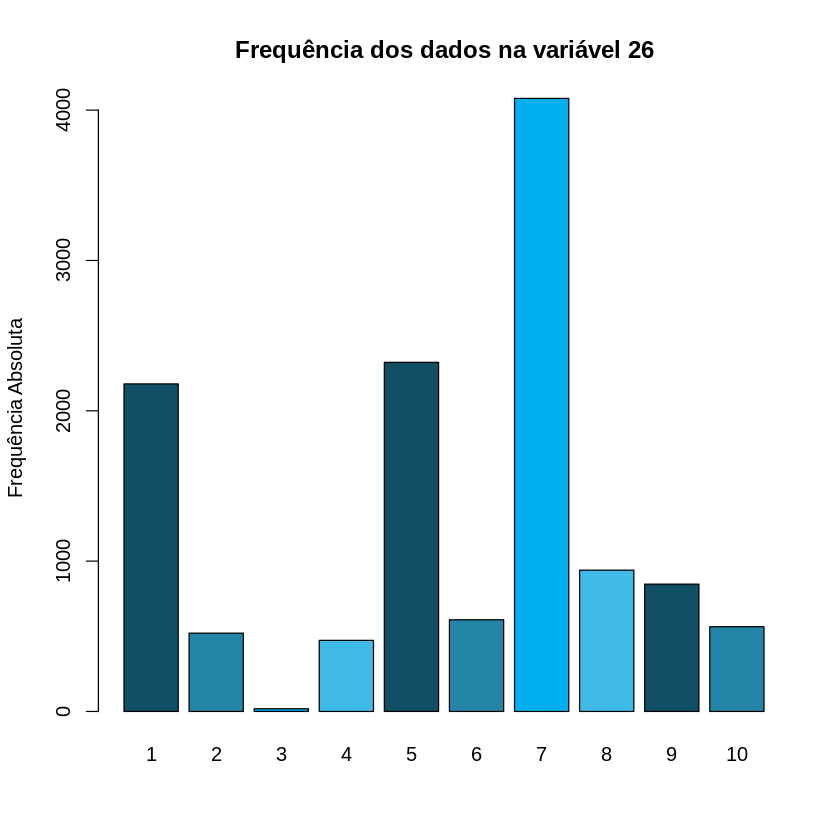

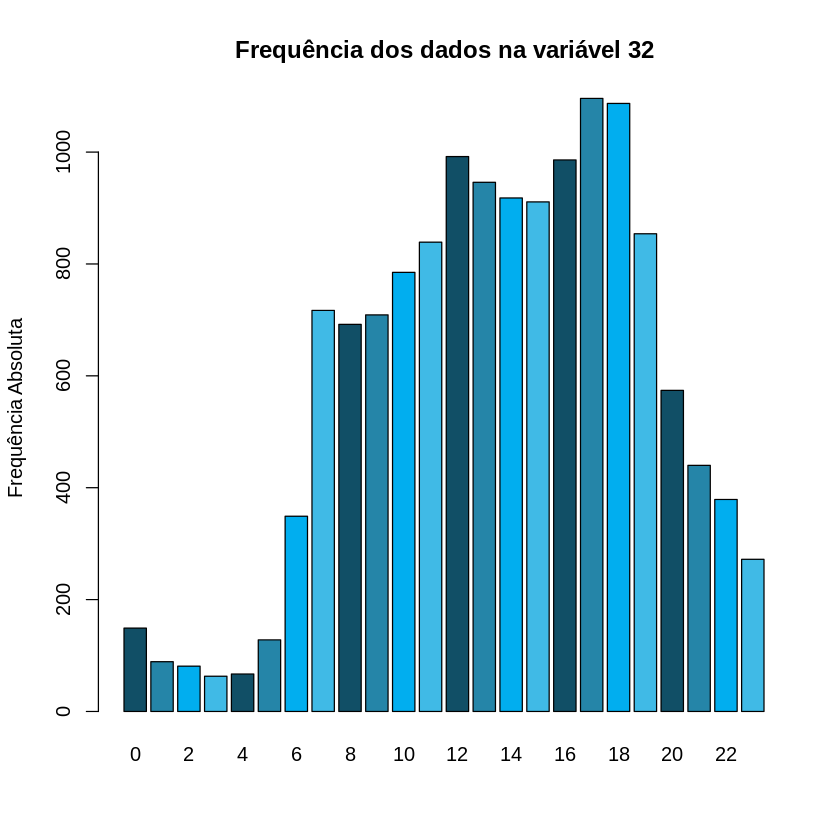

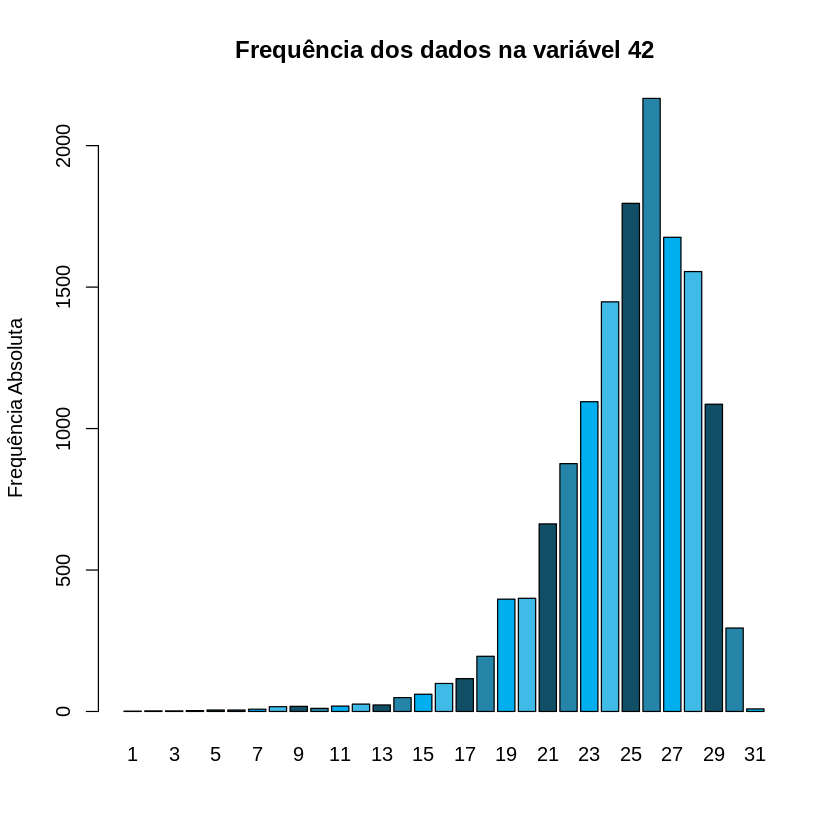

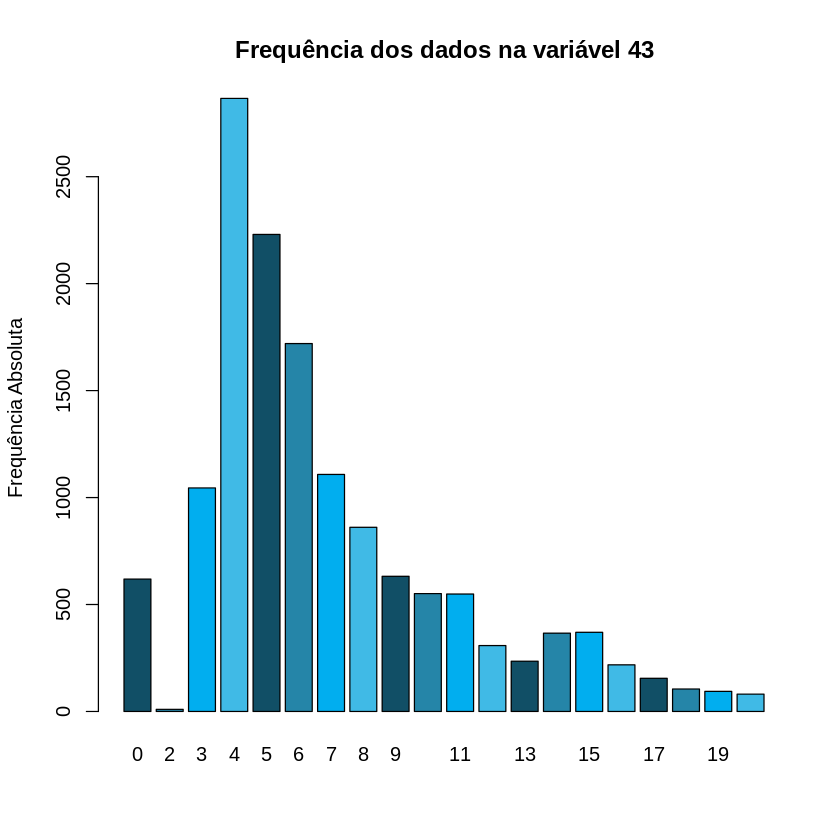

In [ ]:
#FREQUÊNCIA
barplot(
  table(psdata$var26),
  main = "Frequência dos dados na variável 26",
  ylab = "Frequência Absoluta",
  col = c("#114F66", "#2585A8", "#01AEEF", "#40BAE6")
)

barplot(
  table(psdata$var32),
  main = "Frequência dos dados na variável 32",
  ylab = "Frequência Absoluta",
  col = c("#114F66", "#2585A8", "#01AEEF", "#40BAE6")
)

barplot(
  table(psdata$var42),
  main = "Frequência dos dados na variável 42",
  ylab = "Frequência Absoluta",
  col = c("#114F66", "#2585A8", "#01AEEF", "#40BAE6")
)

barplot(
  table(psdata$var43),
  main = "Frequência dos dados na variável 43",
  ylab = "Frequência Absoluta",
  col = c("#114F66", "#2585A8", "#01AEEF", "#40BAE6")
)



In [ ]:
Moda(QualOrd)

Variaveis,Moda,Nº de ocorrência
<chr>,<chr>,<int>
var26,7,4078
var32,17,1096
var42,26,2167
var43,4,2866


variaveis,Qtd. Dados Ausentes,Porcentagem | (Dados Ausentes ÷ 14123)%
<chr>,<dbl>,<dbl>
var26,1571,11.1237
var32,0,0.0000
var42,0,0.0000
var43,0,0.0000


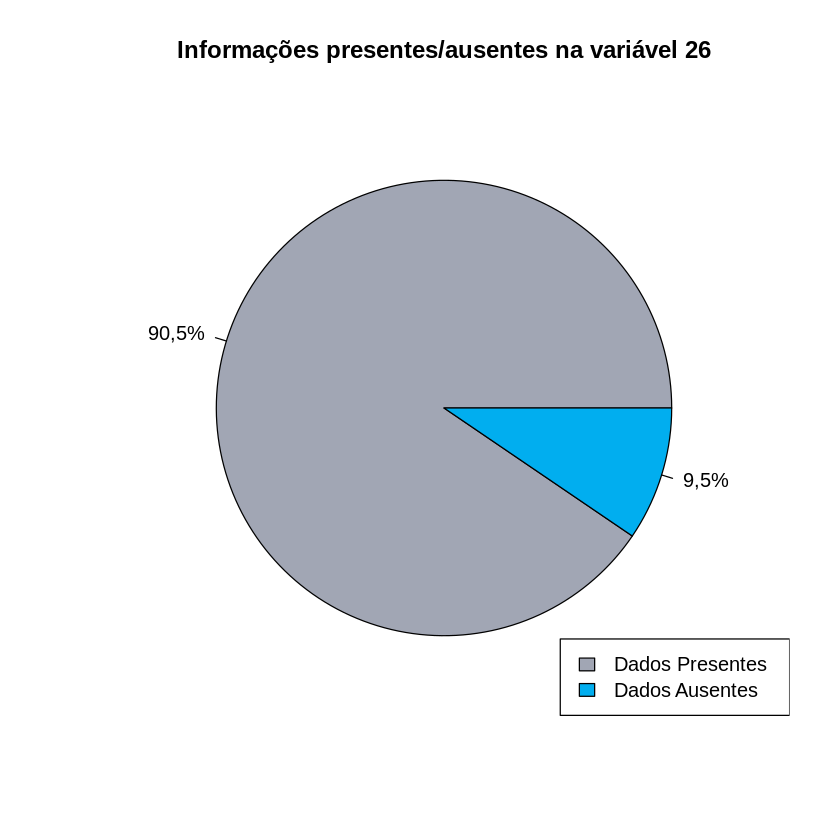

In [ ]:
dfqo = DadosFaltantesPorVariavel(QualOrd)
dfqo
pie(
  c(12781, 1342),
  main = "Informações presentes/ausentes na variável 26",
  label = c("90,5%", "9,5%"),
  col = colors
  )
legend("bottomright", c("Dados Presentes", "Dados Ausentes"), fill = colors)

# ESTUDO DAS VARIÁVEIS QUANTITATIVAS DISCRETAS


  - Medidas Resumo;
  - Dados discrepantes;
  - Dados faltantes;
  - Correlação;
  - Amplitude dos dados;
  - Histograma;
  - BoxPlot

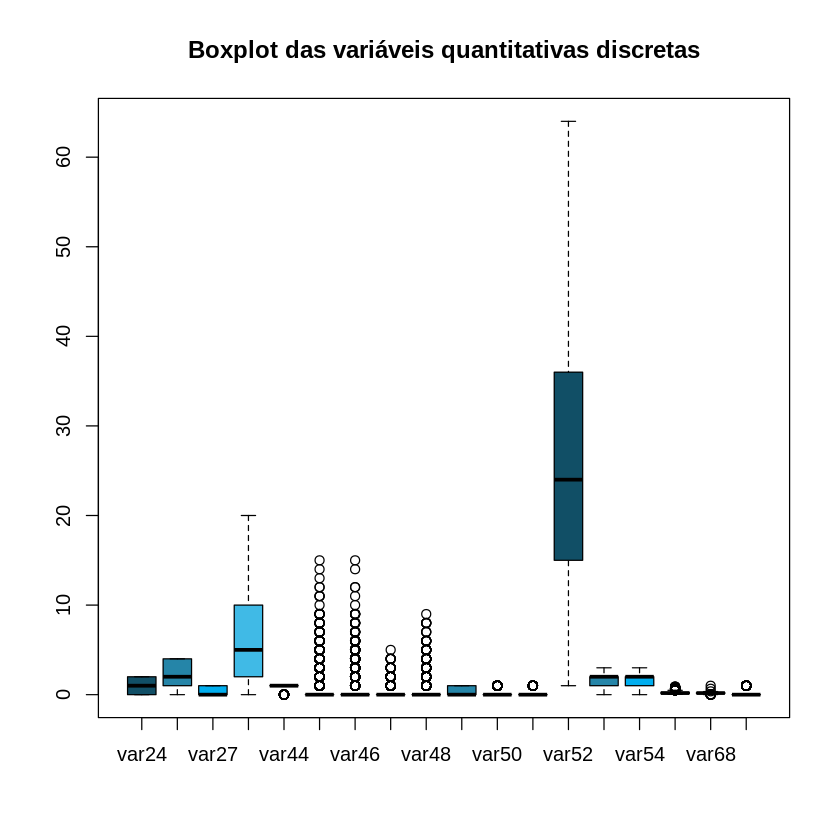

In [ ]:
boxplot(
  psdata[QuantDisc],
  main = "Boxplot das variáveis quantitativas discretas",
  col =  c("#114F66", "#2585A8", "#01AEEF", "#40BAE6")
  )

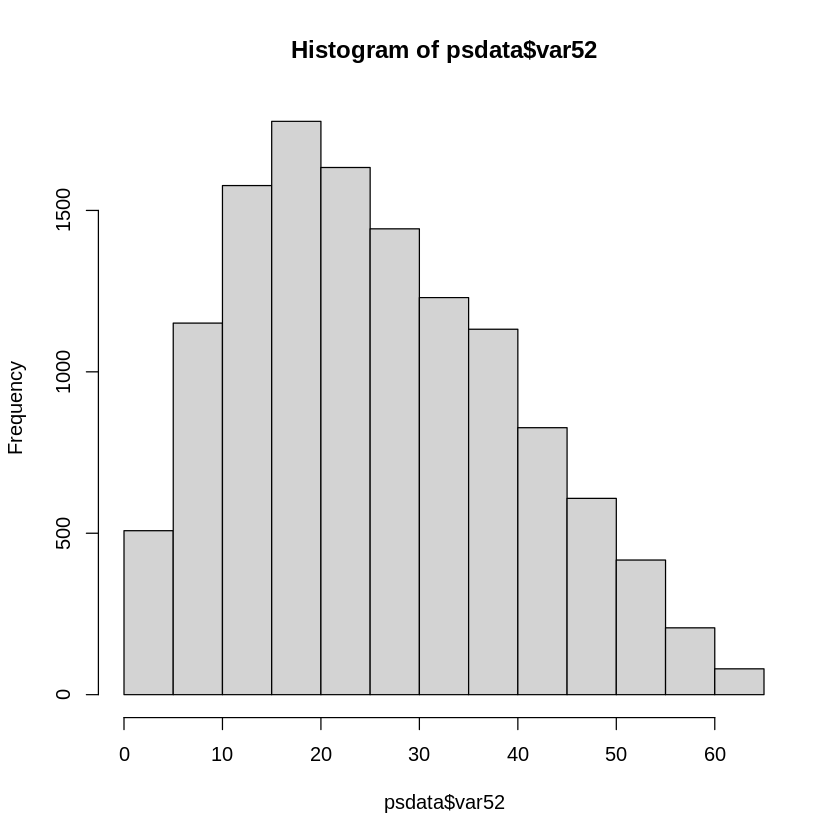

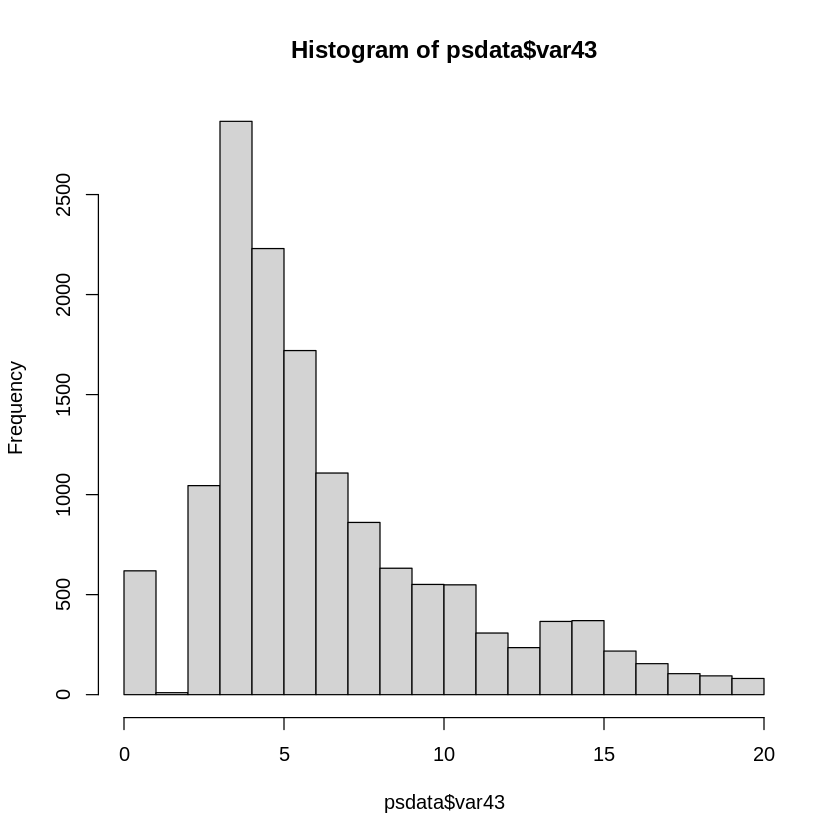

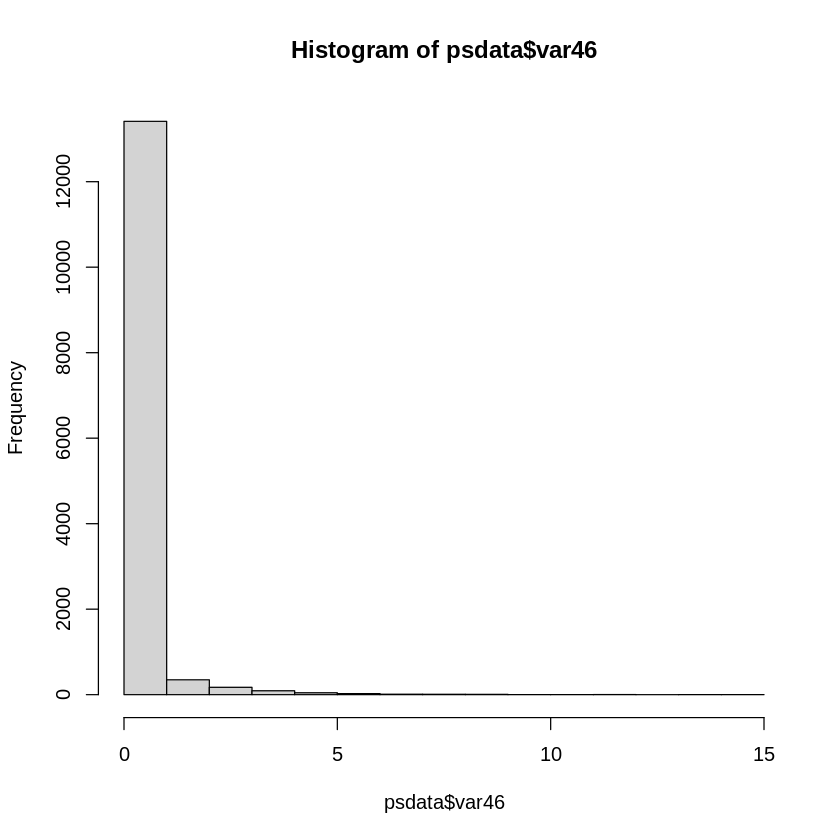

In [ ]:
hist(psdata$var52)
hist(psdata$var43)
hist(psdata$var46)

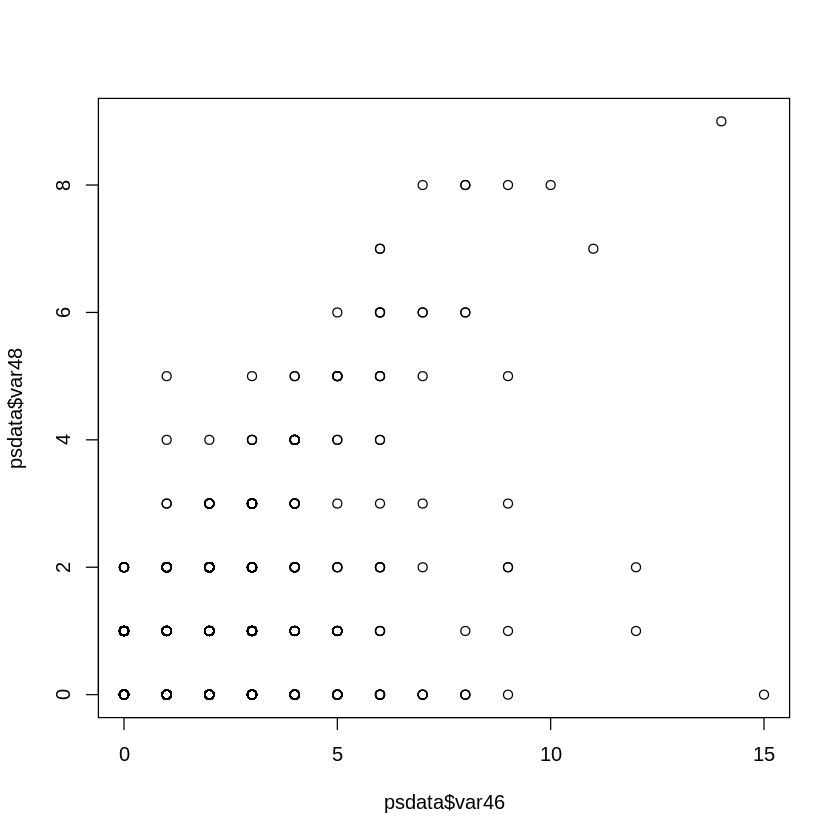

In [ ]:
plot(psdata$var46,psdata$var48)

,variaveis,Qtd. Dados Ausentes
,<chr>,<dbl>
1,var24,0
2,var25,0
3,var27,0
4,var40,0
5,var44,0
6,var45,0
7,var46,0
8,var47,0
9,var48,0


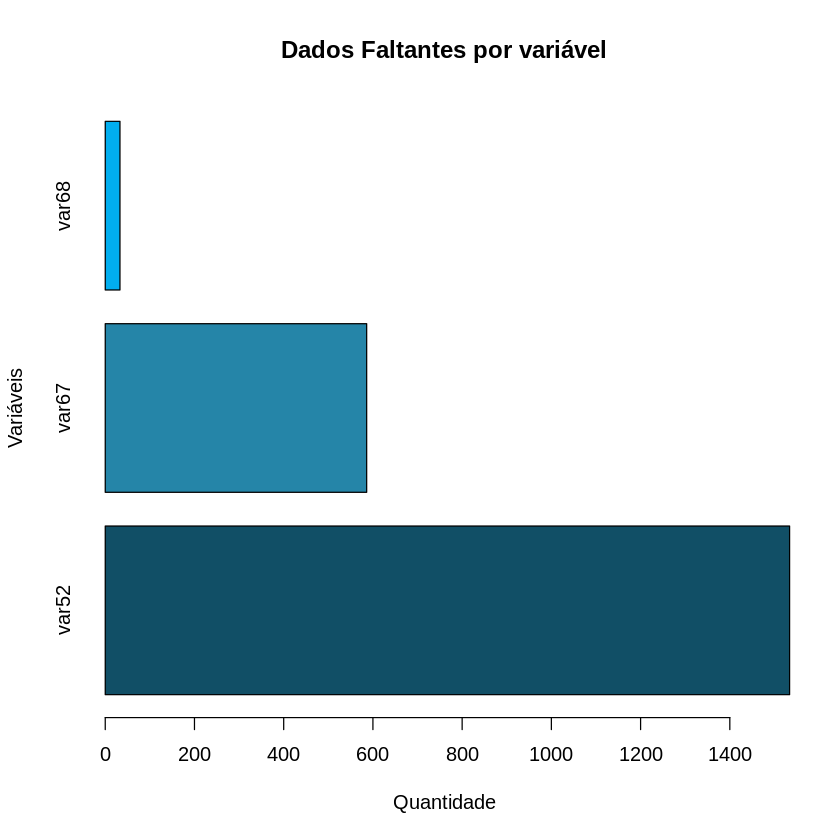

In [ ]:
#DADOS FALTANTES POR VARIÁVEL
dfpvQD = DadosFaltantesPorVariavel(QuantDisc)
tabDfpvQD = dfpvQD[-18, c(1,2)] # Tirando a variável y
tabDfpvQD

barplot(
  c(1534, 586, 33),
  names.arg = c('var52', 'var67', 'var68'),
  main = "Dados Faltantes por variável",
  ylab = "Variáveis",
  xlab = "Quantidade",
  col = c("#114F66", "#2585A8", "#01AEEF", "#40BAE6"),
  horiz = T
)


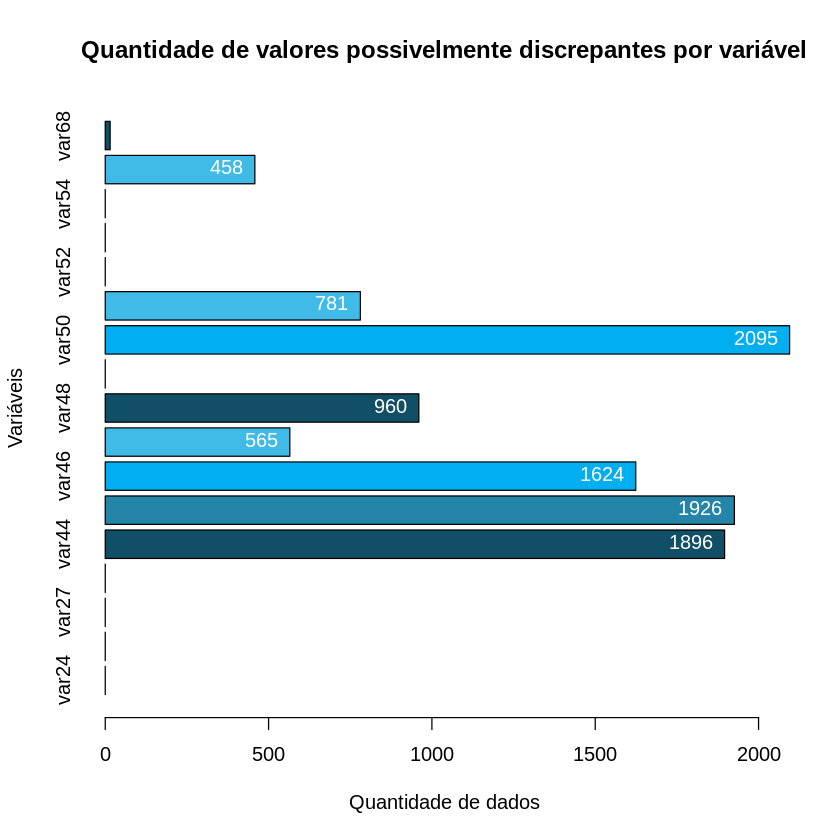

In [ ]:
#DADOS Possivelmete DISCREPANTES
ddqc = QuantidadeDeValoresPossivelmenteDiscrepantes(QuantDisc)
tab = ddqc[-18,c(1,4)]


text(
barplot(
  tab[,2],
  names.arg = tab[,1],
  main = "Quantidade de valores possivelmente discrepantes por variável",
  ylab = "Variáveis",
  xlab = "Quantidade de dados",
  col = c("#114F66", "#2585A8", "#01AEEF", "#40BAE6"),
  horiz = T
), x = tab[,2], labels = tab[,2], pos = 2, col = "white"
)

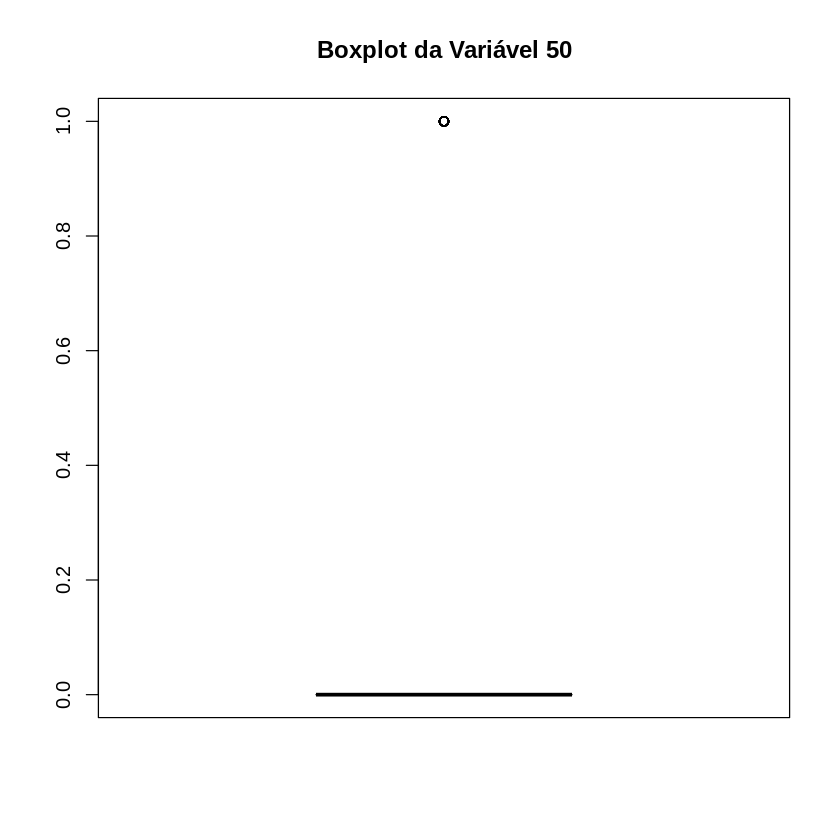

In [ ]:
boxplot(
  psdata$var50,
  main = "Boxplot da Variável 50",
  col = "#2585A8"
  )


    0     1 
11273  2850 

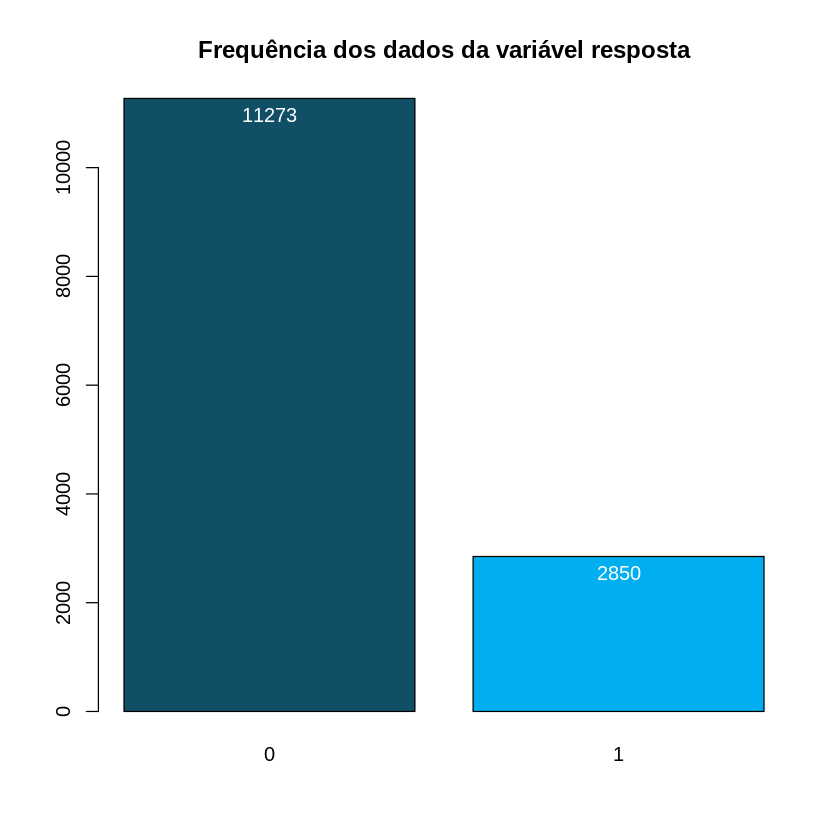

In [ ]:
taby = table(psdata$y)
taby
text(
barplot(
  taby,
  main = "Frequência dos dados da variável resposta",
  col = c("#114F66","#01AEEF"),
  ), y = c(11273, 2850), labels = c(11273, 2850), pos = 1, col = "white"
)

# ESTUDO DAS VARIÁVEIS QUANTIDADE CONTÍNUAS

  - Medidas Resumo;
  - Dados discrepantes;
  - Dados faltantes;
  - Correlação;
  - Amplitude dos dados;
  - Histograma;
  - BoxPlot

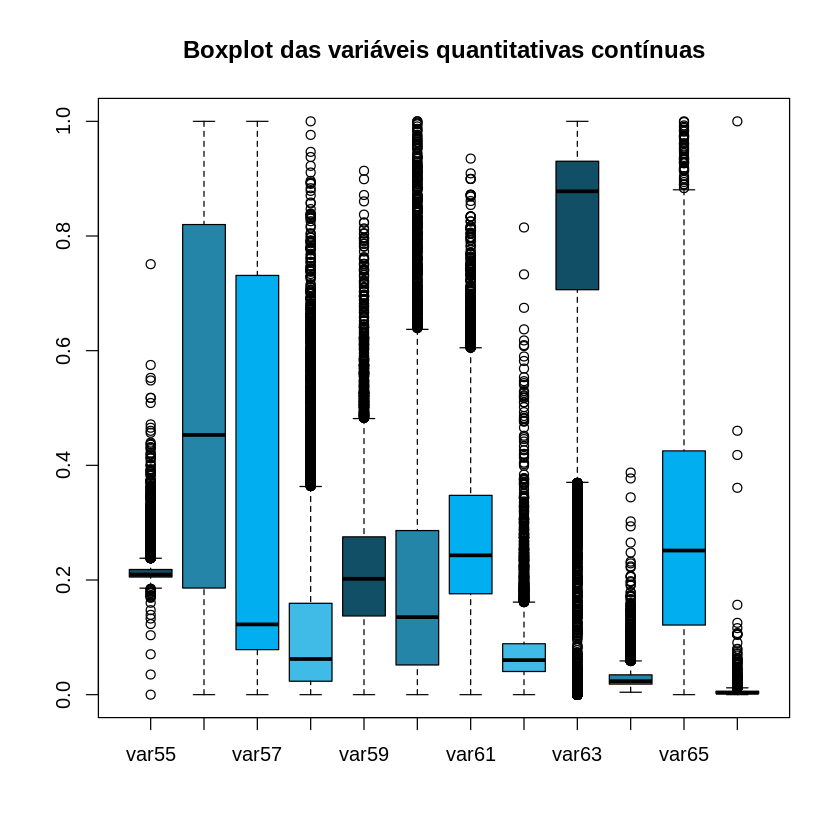

In [ ]:
boxplot(
  psdata[QuantCont],
  main = "Boxplot das variáveis quantitativas contínuas",
  col =  c("#114F66", "#2585A8", "#01AEEF", "#40BAE6")
  )

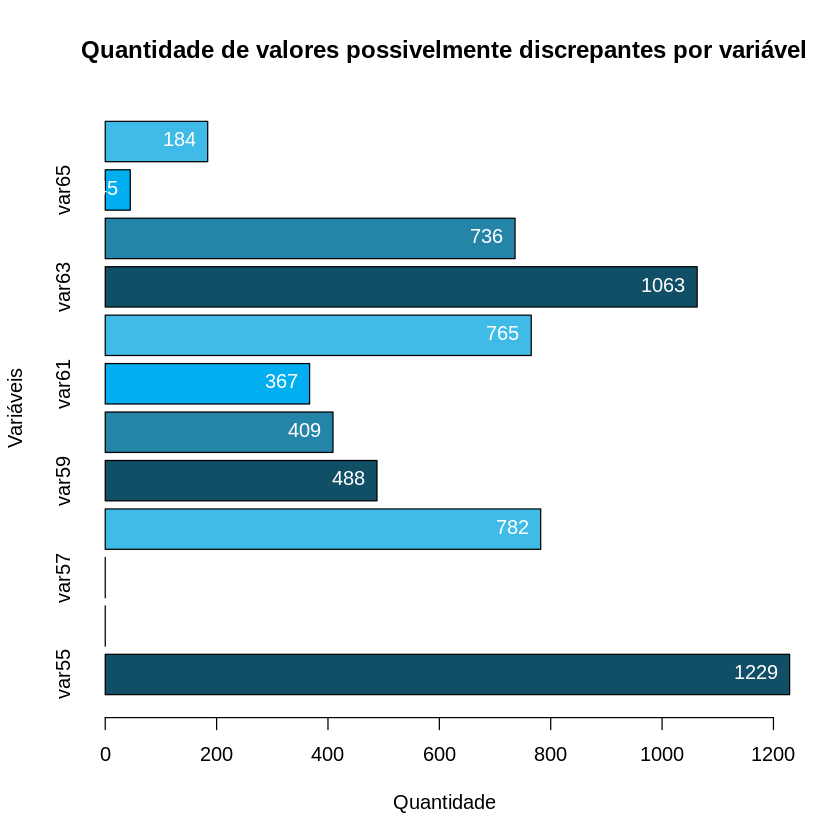

In [ ]:
#DADOS Possivelmete DISCREPANTES
qvpdQC = QuantidadeDeValoresPossivelmenteDiscrepantes(QuantCont)

text(
barplot(
  qvpdQC[,4],
  names.arg = qvpdQC[,1],
  main = "Quantidade de valores possivelmente discrepantes por variável",
  ylab = "Variáveis",
  xlab = "Quantidade",
  col = c("#114F66", "#2585A8", "#01AEEF", "#40BAE6"),
  horiz = T
), x = qvpdQC[,4], labels = qvpdQC[,4], pos = 2, col = "white"
)

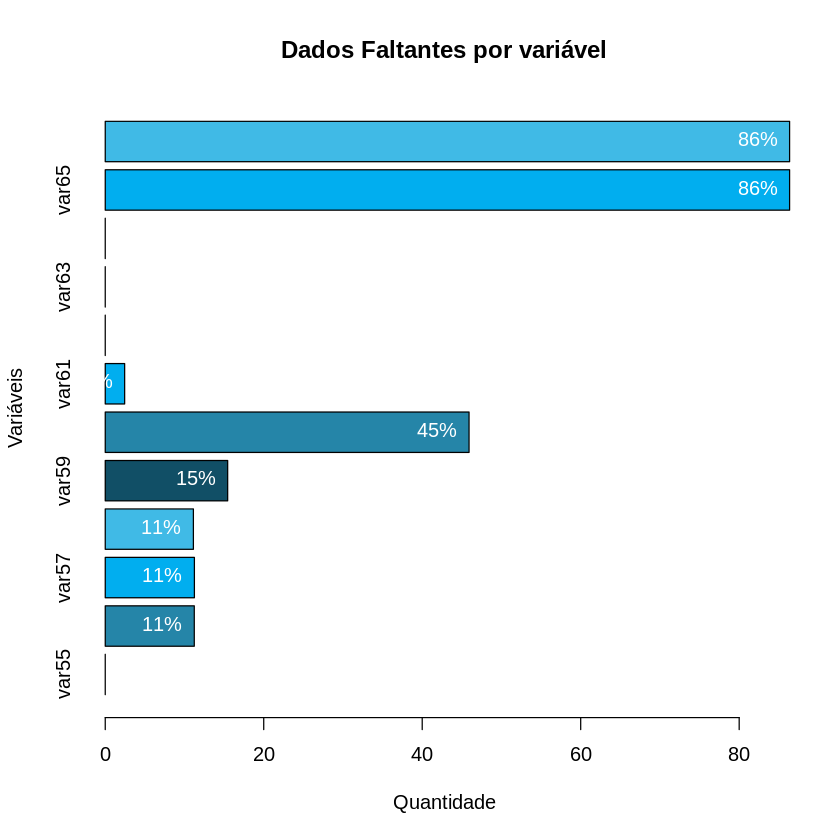

In [ ]:
dfpvQC = DadosFaltantesPorVariavel(QuantCont)
# dfpvQC
text(
barplot(
  dfpvQC[,3],
  names.arg = dfpvQC[,1],
  main = "Dados Faltantes por variável",
  ylab = "Variáveis",
  xlab = "Quantidade",
  col = c("#114F66", "#2585A8", "#01AEEF", "#40BAE6"),
  horiz = T
), x = dfpvQC[,3], labels = c(0, '11%', '11%', '11%', '15%', '45%', '2%', 0, 0, 0, '86%', '86%'), pos = 2, col = "white"
)

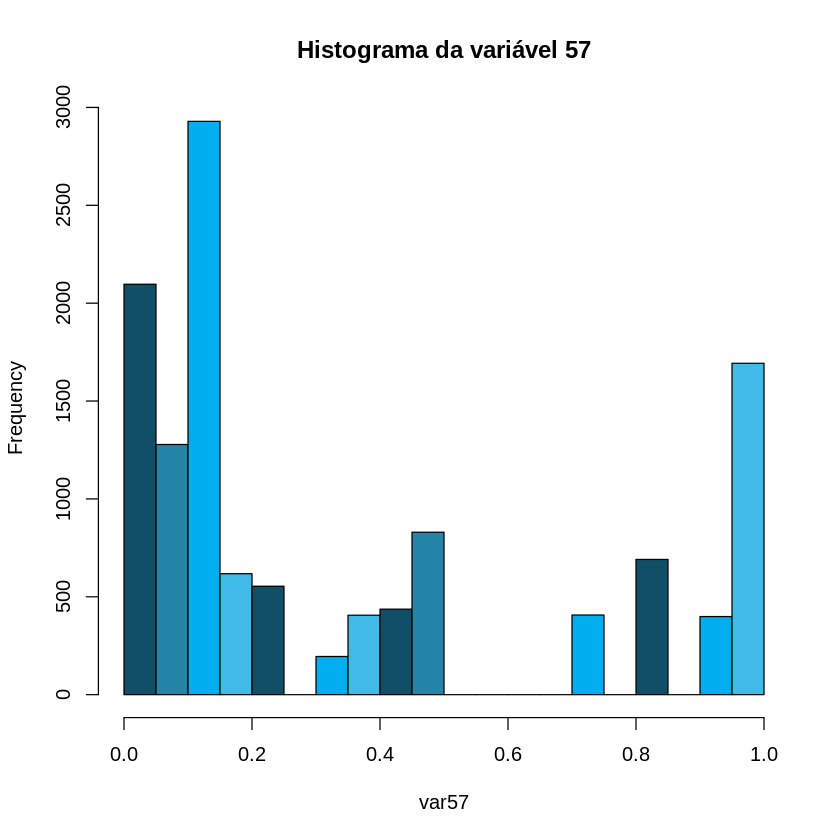

In [ ]:
var57 = psdata$var57
hist(
  var57,
  main = "Histograma da variável 57",
  col = c("#114F66", "#2585A8", "#01AEEF", "#40BAE6")
)
# hist(psdata$var65)

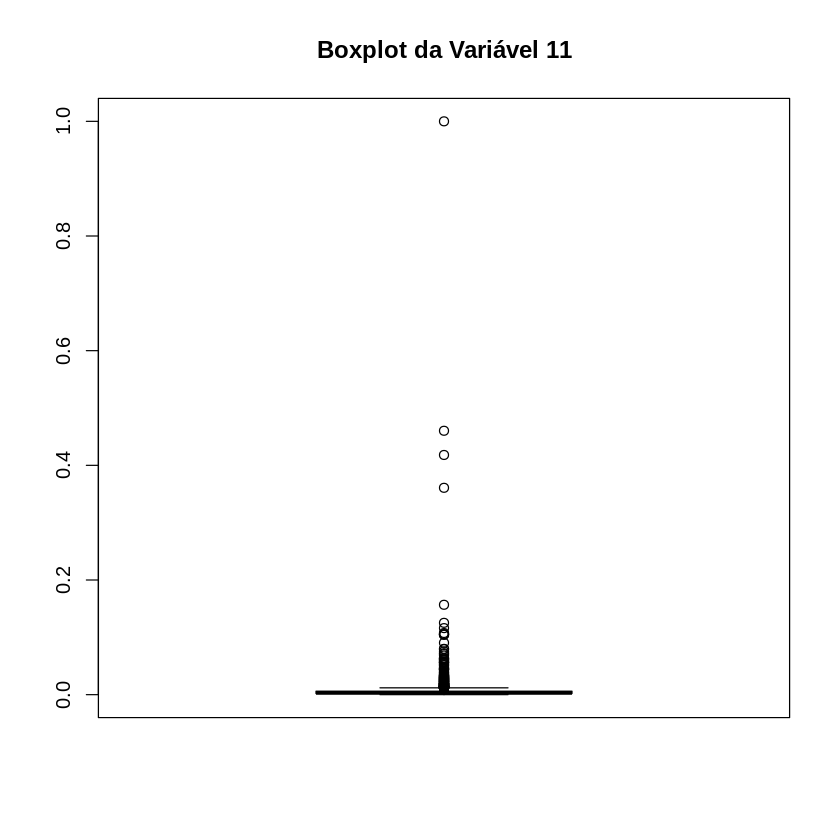

In [ ]:
boxplot(
  psdata$var66,
  main = "Boxplot da Variável 11",
  col = "#2585A8"
  )

In [ ]:
TabelaDeMedidasResumo(QuantCont)

Variaveis,Média,Mediana,Desvio Padrão,Desvio Absoluto Mediano,Coeficiente de variacao (%),Max.,Min.
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
var55,0.216031191,0.20946498,0.02264158,0.005370749,0.005370749,0.7508578,0.00000000
var56,0.490075463,0.45300000,0.32526993,0.302000000,0.302000000,1.0000000,0.00000000
var57,0.345775190,0.12258065,0.35699975,0.122580645,0.122580645,1.0000000,0.00000000
var58,0.116597928,0.06224898,0.13878019,0.046114232,0.046114232,1.0000000,0.00000000
var59,0.221587802,0.20204574,0.12000767,0.068259171,0.068259171,0.9137730,0.00000000
var60,0.203007885,0.13526722,0.20486673,0.099806595,0.099806595,1.0000000,0.00000000
var61,0.270888062,0.24305264,0.13831680,0.079908978,0.079908978,0.9349940,0.00000000
var62,0.073086007,0.06026501,0.05396327,0.022765030,0.022765030,0.8148459,0.00000000
var63,0.779220518,0.87790111,0.23406807,0.067608476,0.067608476,1.0000000,0.00000000


# ESTUDO DA CORRELAÇÃO E ASSOCIAÇÃO

QUANTITATIVAS CONTÍNUAS

,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66
var55,1.000000000,-0.025773857,0.002556982,-0.0317023629,-0.015332961,-0.008049294,0.065944289,0.336825994,-0.0362609371,0.345418895,-0.091737517,-0.006307792
var56,-0.025773857,1.000000000,-0.892982746,0.0297056087,0.038859863,0.027762744,0.008119498,-0.011519095,0.0150129184,0.009028510,-0.091582303,-0.017532064
var57,0.002556982,-0.892982746,1.000000000,-0.0833540366,-0.047128422,-0.041979866,-0.016431766,-0.016227715,0.0055857864,-0.016931551,0.107444141,0.006396330
var58,-0.031702363,0.029705609,-0.083354037,1.0000000000,-0.003681977,0.010426351,-0.015414673,0.009315270,0.0006100563,-0.048841154,-0.009323871,-0.019143953
var59,-0.015332961,0.038859863,-0.047128422,-0.0036819769,1.000000000,0.255415763,0.232029354,0.061375615,-0.0021200517,0.030082809,0.039728694,0.026339107
var60,-0.008049294,0.027762744,-0.041979866,0.0104263509,0.255415763,1.000000000,0.029462326,-0.028437660,-0.0058309263,-0.040215481,0.027907422,0.006435725
var61,0.065944289,0.008119498,-0.016431766,-0.0154146732,0.232029354,0.029462326,1.000000000,0.281685374,0.0670658266,0.109680998,0.031991554,-0.021027316
var62,0.336825994,-0.011519095,-0.016227715,0.0093152698,0.061375615,-0.028437660,0.281685374,1.000000000,0.0309267403,0.574897093,-0.006209741,-0.032907586
var63,-0.036260937,0.015012918,0.005585786,0.0006100563,-0.002120052,-0.005830926,0.067065827,0.030926740,1.0000000000,-0.092529518,0.025880164,-0.065140258
var64,0.345418895,0.009028510,-0.016931551,-0.0488411537,0.030082809,-0.040215481,0.109680998,0.574897093,-0.0925295178,1.000000000,0.019526440,0.005613947


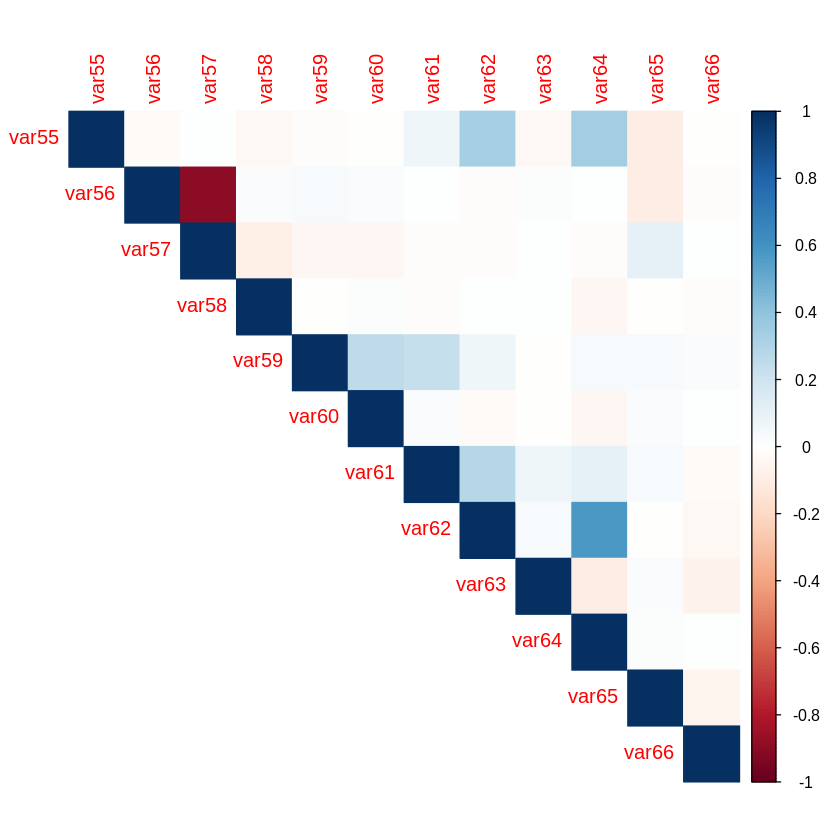

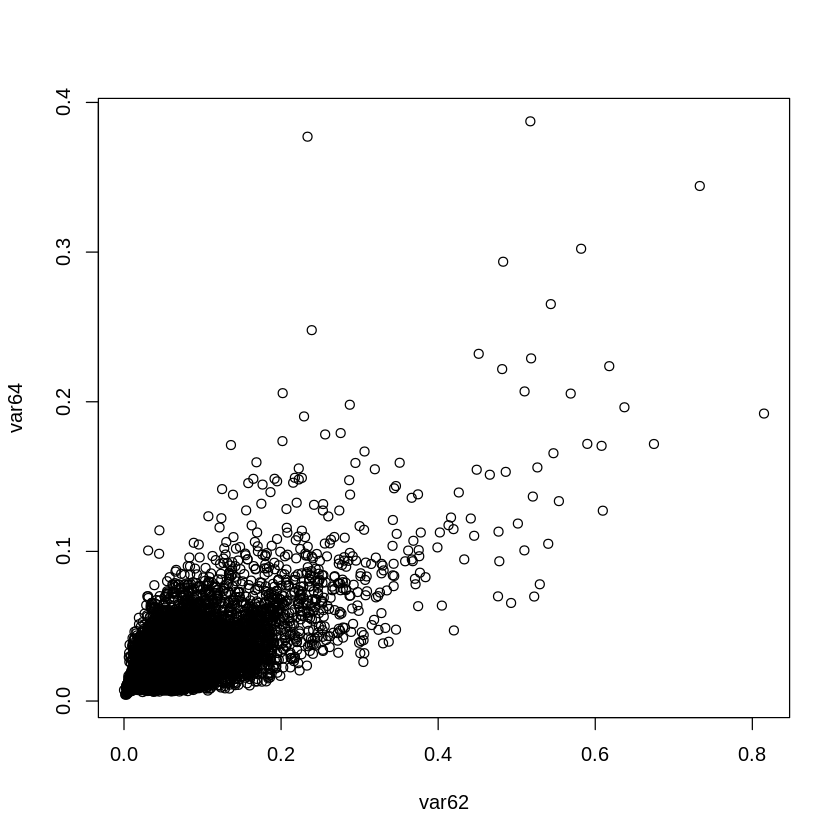

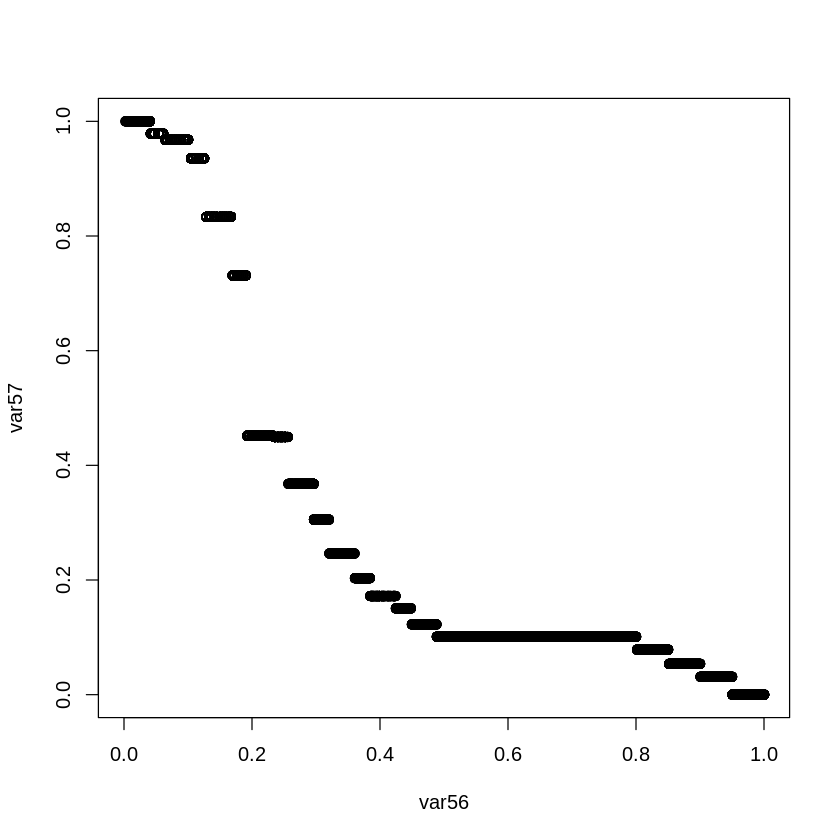

In [ ]:
# VARIÁVEIS QUANTITATIVAS CONTÍNUAS
cor(psdata[,QuantCont], use = "complete.obs")
corrplot(cor(psdata[,QuantCont], use = "complete.obs"), type = "upper", method = "color")
# (62, 64) e (56, 57)
var62 = psdata$var62
var64 = psdata$var64
plot(var62, var64)

var56 = psdata$var56
var57 = psdata$var57
plot(var56,var57 )

QUANTITATIVA DISCRETA

,var24,var25,var27,var40,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var67,var68,y
var24,1.000000000,-0.011837558,-0.009684180,-0.024079403,0.0057152896,-0.019420615,-0.0278875058,0.016204884,-0.015305651,-0.368400558,0.008462988,0.062857939,-0.012267235,0.051038986,-0.019047203,0.049498529,-0.024555507,-0.036874383
var25,-0.011837558,1.000000000,-0.007874429,0.030704252,0.0085590182,-0.033208975,-0.0317584898,-0.016285598,-0.021787898,0.018095734,0.003476753,0.031946698,-0.010783500,0.001078132,0.004642382,0.008801536,-0.009921421,0.004547969
var27,-0.009684180,-0.007874429,1.000000000,0.069943944,0.0037482306,0.275765608,0.2555548080,0.159474012,0.275979474,0.124225311,-0.121651772,0.014595324,0.112373175,0.038275820,0.004703170,-0.109722738,0.030265965,0.055189289
var40,-0.024079403,0.030704252,0.069943944,1.000000000,0.0878960294,0.019711169,0.0141262326,0.021582411,0.016471223,0.032928166,-0.012177617,-0.003592059,-0.006018266,-0.010032968,-0.025007678,-0.013245107,0.339226233,0.052271033
var44,0.005715290,0.008559018,0.003748231,0.087896029,1.0000000000,-0.001851443,0.0006122101,-0.008546942,-0.003219211,-0.049133442,-0.025583666,0.021927063,0.002217489,0.004112688,-0.001303076,0.011704429,0.029101194,0.001221501
var45,-0.019420615,-0.033208975,0.275765608,0.019711169,-0.0018514431,1.000000000,0.9541930292,0.505104760,0.677502451,0.088902175,-0.079310530,0.005695629,0.166603783,0.014768672,0.009084418,-0.109694663,0.016699935,0.005436777
var46,-0.027887506,-0.031758490,0.255554808,0.014126233,0.0006122101,0.954193029,1.0000000000,0.232796356,0.646832224,0.078238222,-0.074951061,0.001422425,0.157693870,0.014668826,0.008734984,-0.106447293,0.017476501,0.003354048
var47,0.016204884,-0.016285598,0.159474012,0.021582411,-0.0085469415,0.505104760,0.2327963558,1.000000000,0.348357202,0.070780238,-0.041299017,0.012273561,0.085591679,0.005884820,0.006518475,-0.049198700,0.004100786,0.004224441
var48,-0.015305651,-0.021787898,0.275979474,0.016471223,-0.0032192111,0.677502451,0.6468322236,0.348357202,1.000000000,0.080541401,-0.059465078,-0.009261880,0.122326921,0.011099057,0.010419274,-0.073370826,0.008434916,-0.002225371
var49,-0.368400558,0.018095734,0.124225311,0.032928166,-0.0491334422,0.088902175,0.0782382223,0.070780238,0.080541401,1.000000000,-0.060212235,-0.023532293,0.037281574,-0.015164690,0.046581589,-0.129060332,0.001396577,-0.007627828


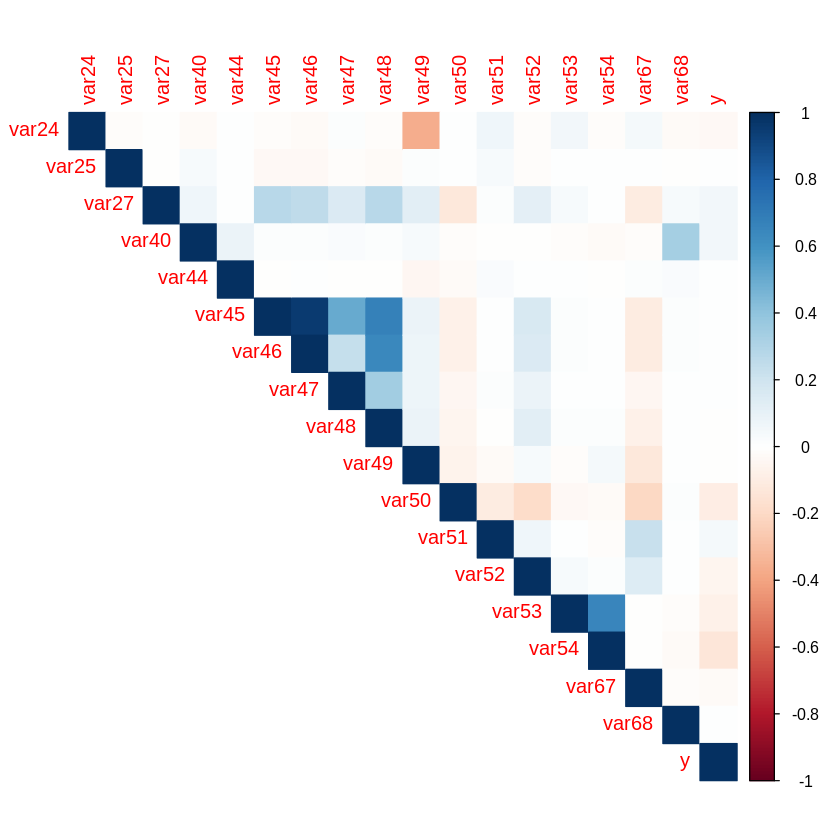

In [ ]:
cor(psdata[,QuantDisc], use = "complete.obs")
corrplot(cor(psdata[,QuantDisc], use = "complete.obs"), type = "upper", method = "color")

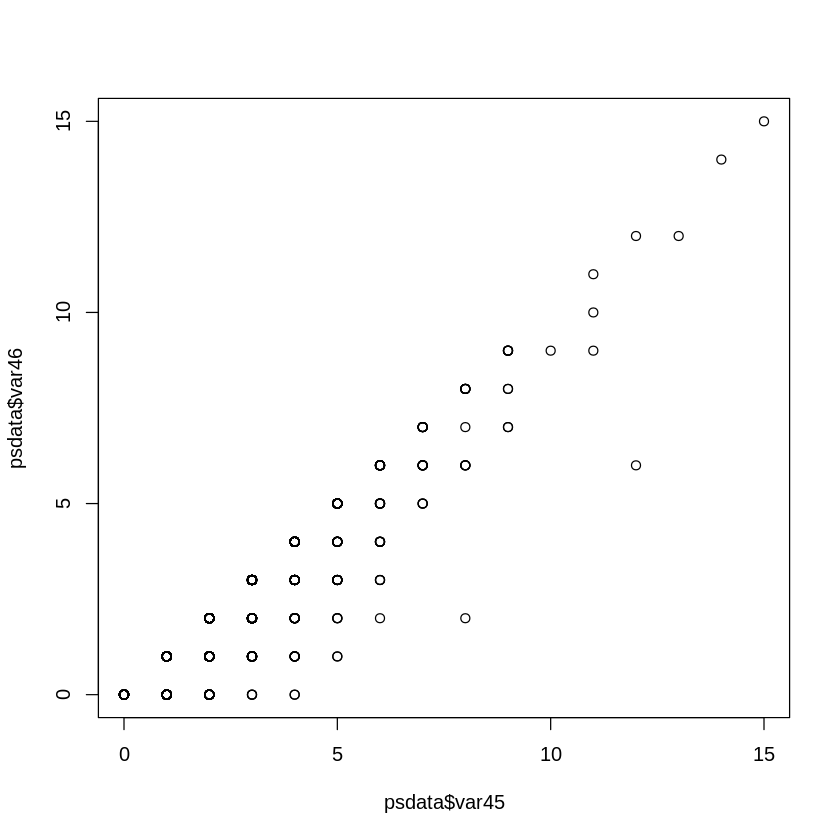

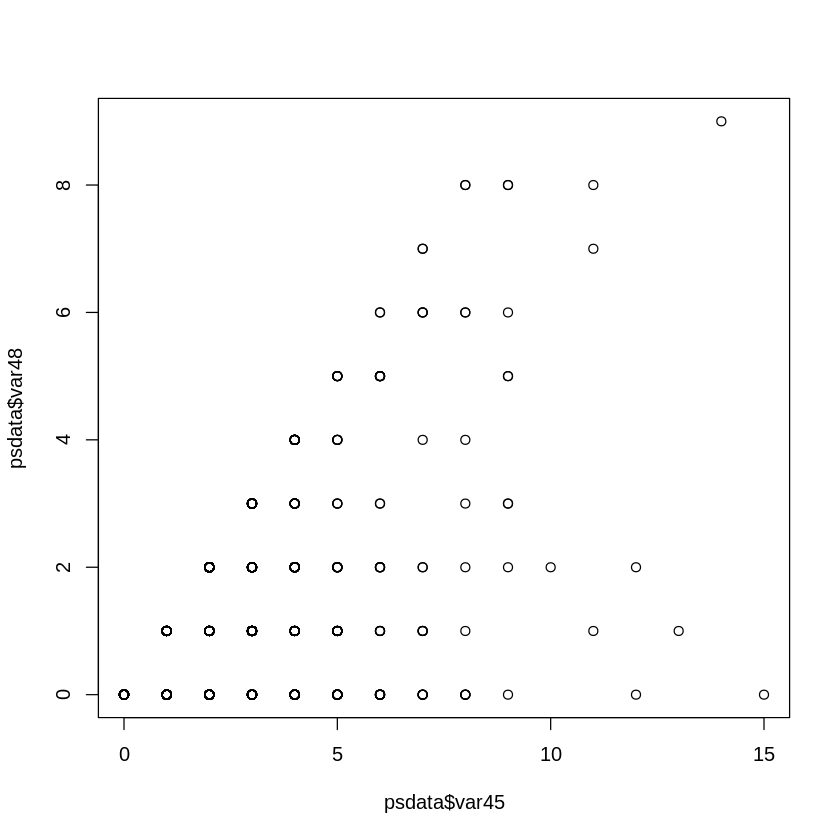

In [ ]:
# (45,48) (45,46) (46,48)
plot(psdata$var45, psdata$var46)
plot(psdata$var45, psdata$var48)

QUALITATIVAS ORDINAIS

In [ ]:

n = table(psdata[c("var42", "y")])
chisq.test(n, simulate.p.value = T)

m = table(psdata[c("var43", "y")])
chisq.test(m, simulate.p.value = T)


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  n
X-squared = 134.21, df = NA, p-value = 0.0004998



	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  m
X-squared = 73.123, df = NA, p-value = 0.0004998


In [ ]:
associacaoVarY <- function(tipoDeVariavel){
  #QualNom #QualOrd
  tabelaTipoVariavel = psdata[tipoDeVariavel]
  nomesVar = names(tabelaTipoVariavel)
  ChiQuadrado = data.frame(
    variaveis = c(nomesVar)
  )
  # y = psdata["y"]

  for(c in 1:ncol(tabelaTipoVariavel)){
    n = table(psdata[c("y", nomesVar[c])])
    estatisticas = chisq.test(n, simulate.p.value = T)
    ChiQuadrado[c,"Chi-Quadrado"] = estatisticas[[1]]
    ChiQuadrado[c,"p-valor"] = estatisticas[[3]]
}
  return (ChiQuadrado)
}

In [ ]:
#Qualitativas Nominais
table(psdata[c("var30", "var31")])
chisq.test(table(psdata[c("var30", "var31")]))

     var31
var30    0    1
    0    0  514
    1 7631    0
    2 5978    0


	Pearson's Chi-squared test

data:  table(psdata[c("var30", "var31")])
X-squared = 14123, df = 2, p-value < 2.2e-16


ASSOCIAÇÃO ENTRE Y E QUANTITATIVAS

In [ ]:
table(psdata[c("y", "var31")])
chisq.test(table(psdata[c("y", "var31")]))

   var31
y       0     1
  0 10858   415
  1  2751    99


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(psdata[c("y", "var31")])
X-squared = 0.22369, df = 1, p-value = 0.6362


# ABA DE TESTE DOS CÓDIGOS

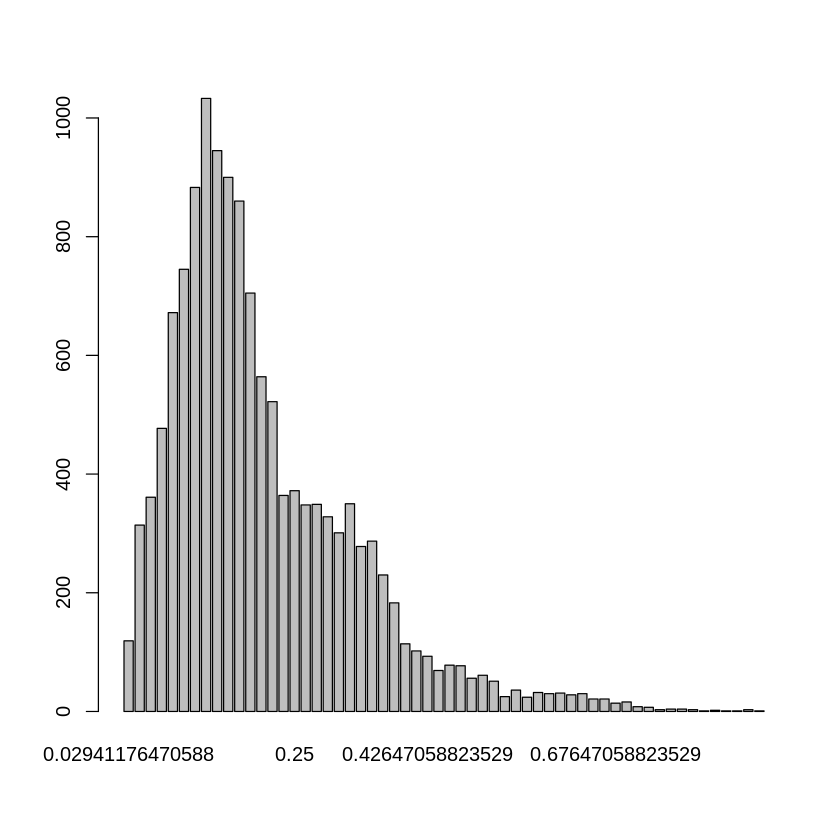

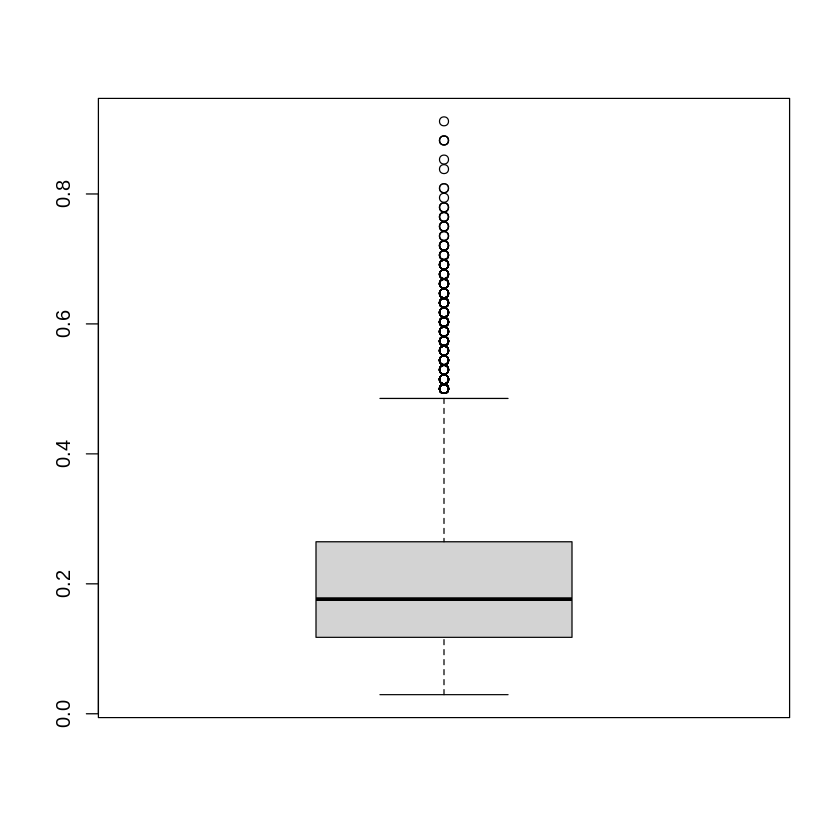

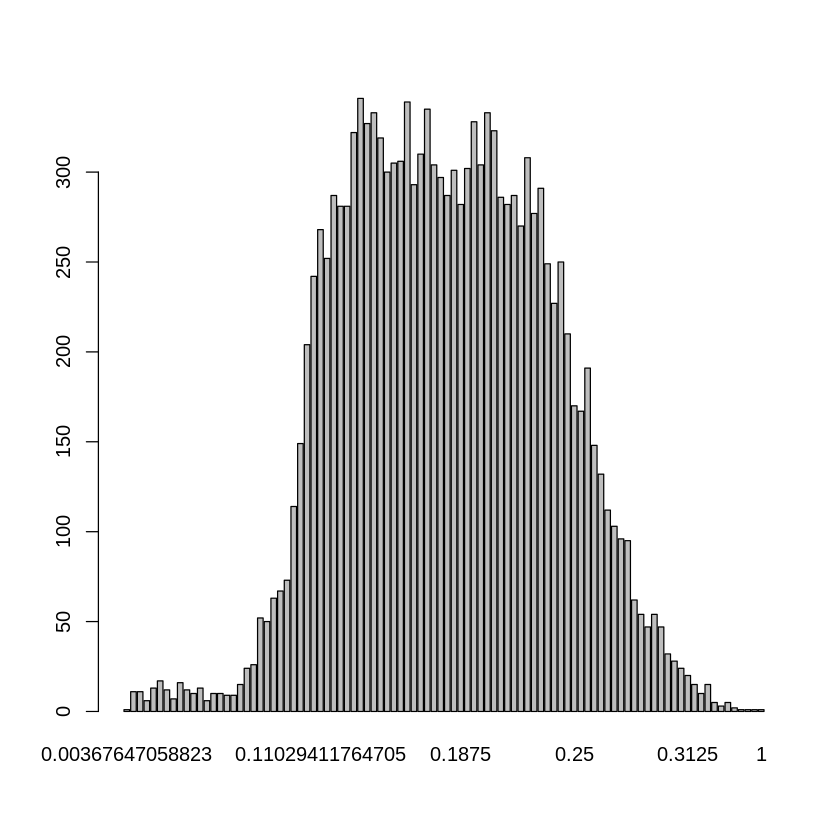

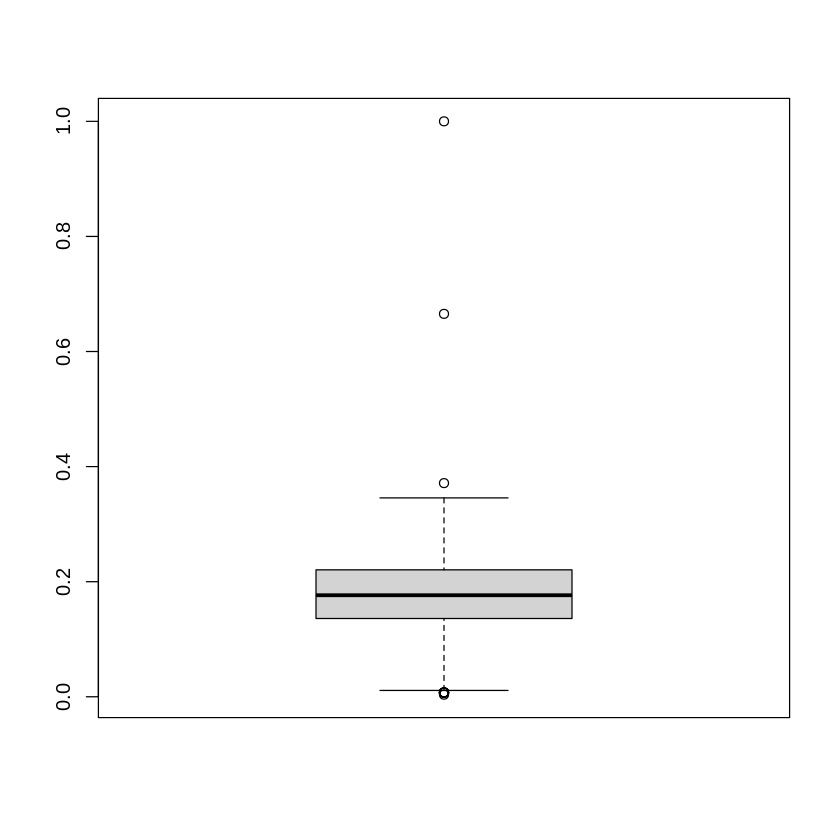

In [ ]:
# Dados aparentemente contínuos mas de comportamento discreto
#Adicionar na seção sobre as variáveis quantitativas discretas

var67 = psdata$var67
var68 = psdata$var68
barplot(table(var67))
boxplot(var67)
barplot(table(var68))
boxplot(var68)

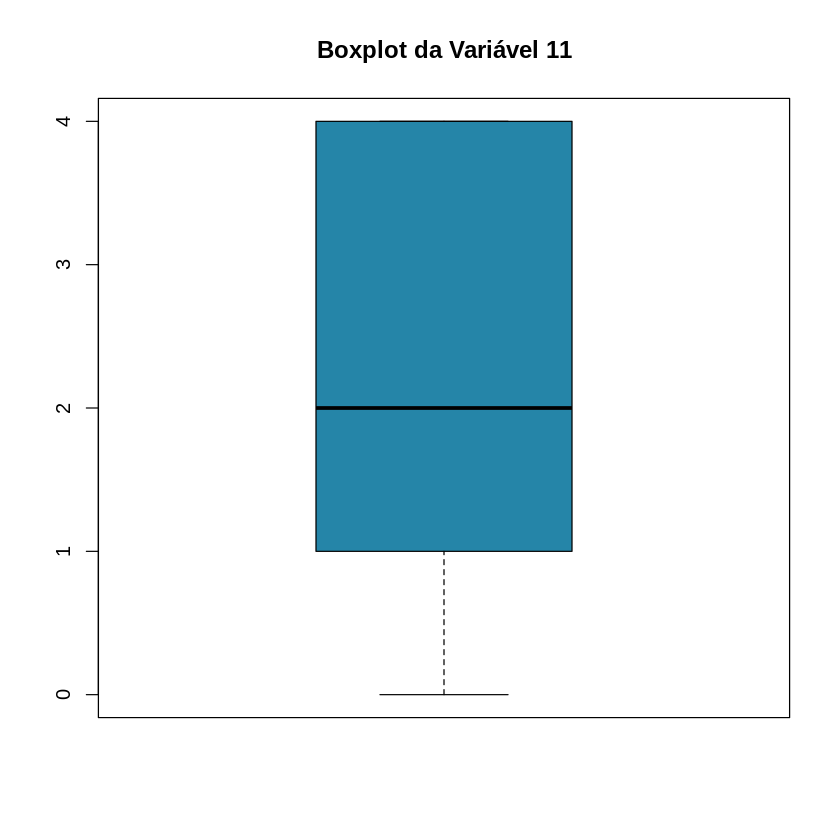

In [ ]:
#Modelo de boxplot
boxplot(
  psdata$var25,
  main = "Boxplot da Variável 11",
  col = "#2585A8"
  )

In [ ]:
#Teste Chi quadrado de Pearson
#Explicar pq são dependentes
#Var31 ~ y
# psdata["var31"]
# psdata["var30"]

In [ ]:
table(psdata[c("var30", "var31")])
chisq.test(table(psdata[c("var30", "var31")]))

     var31
var30    0    1
    0    0  514
    1 7631    0
    2 5978    0


	Pearson's Chi-squared test

data:  table(psdata[c("var30", "var31")])
X-squared = 14123, df = 2, p-value < 2.2e-16


In [ ]:

var22 = psdata$var22
var23 = psdata$var23

m = table(var22, var23)

xq = chisq.test(m)
xq



	Pearson's Chi-squared test

data:  m
X-squared = 7007.1, df = 20, p-value < 2.2e-16


In [ ]:
OpcoesDeValoresVarQual(QualOrd)

variavel,Qtd_de_valores_diferentes_que_a_variável_pode_assumir
<chr>,<int>
var26,11
var32,24
var42,31
var43,20


In [ ]:
var57 = psdata[,"var57"]
# m = median(var57, na.rm = T)
# m
# median(abs(var57 - m), na.rm= T) == m
mean(var57, na.rm = T) == sd(var57, na.rm = T)


[1] FALSE